<a href="https://colab.research.google.com/github/mofuoku417/Machine-Learning-Techniques-for-Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Prices/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mount G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls

'file\df.csv'   gdrive	 sample_data   TarPlt.png


In [ ]:
#!ls # will show you can now access the gdrive locally

### Load the Libraries

In [ ]:
import pandas as pd
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import missingno as msno

###Load Datasets

In [ ]:
file_dir = '/content/gdrive/MyDrive/raw_data'
!ls $file_dir

coconut_oil_pri.csv  df_malaysia2.csv  peanut_oil_pri.csv  sunflower_oil.csv
cpo_pri.csv	     exmaus.csv        rapeseed_oil.csv    wti.csv
df_malaysia1.csv     olive_oil_.csv    soybean_oil.csv


In [ ]:
# Get a python list of csv files
files = glob.glob(os.path.join(file_dir, "*.csv"))

In [ ]:
# Look at some the files to see how we can merge them
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
df6 = pd.read_csv(files[5])
df7 = pd.read_csv(files[6])
df8 = pd.read_csv(files[7])
df9 = pd.read_csv(files[8])
df10 = pd.read_csv(files[9])
df11 = pd.read_csv(files[10])

print(df1.head(), "\n")
print(df2.head(), "\n")
print(df3.head(), "\n")
print(df4.head(), "\n")
print(df5.head(), "\n")
print(df6.head(), "\n")
print(df7.head(), "\n")
print(df8.head(), "\n")
print(df9.head(), "\n")
print(df10.head(), "\n")
print(df11.head(), "\n")

     Month  cno_pri
0  1991-09      455
1  1991-10      546
2  1991-11      595
3  1991-12      636
4  1992-01      738 

     Month  cpo_pri
0  1991-09      323
1  1991-10      345
2  1991-11      362
3  1991-12      376
4  1992-01      383 

     Month  exmaus
0  1971-01  3.0755
1  1971-02  3.0661
2  1971-03  3.0659
3  1971-04  3.0671
4  1971-05  3.0635 

     Month  oli_pri
0  1991-09  3102.61
1  1991-10  3100.45
2  1991-11  3199.41
3  1991-12  3281.67
4  1992-01  3261.65 

     Month  rps_pri
0  2002-02   423.45
1  2002-03   415.85
2  2002-04   410.77
3  2002-05   414.82
4  2002-06   451.04 

     Month  pno_pri
0  1991-09    844.0
1  1991-10    799.0
2  1991-11    718.0
3  1991-12    614.0
4  1992-01    619.0 

     Month  sbo_pri
0  1991-09    468.0
1  1991-10    485.0
2  1991-11    466.0
3  1991-12    442.0
4  1992-01    429.0 

     Month  sfo_pri
0  2002-02    578.0
1  2002-03    557.0
2  2002-04    552.0
3  2002-05    574.0
4  2002-06    595.0 

     Month  wti_spri
0  2001-0

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9, df10, df11], axis=1, join='inner')
#df.set_index('Month', inplace=True)
print(df.head())

     Month  cno_pri    Month  cpo_pri    Month  exmaus    Month  oli_pri  \
0  1991-09      455  1991-09      323  1971-01  3.0755  1991-09  3102.61   
1  1991-10      546  1991-10      345  1971-02  3.0661  1991-10  3100.45   
2  1991-11      595  1991-11      362  1971-03  3.0659  1991-11  3199.41   
3  1991-12      636  1991-12      376  1971-04  3.0671  1991-12  3281.67   
4  1992-01      738  1992-01      383  1971-05  3.0635  1992-01  3261.65   

     Month  rps_pri  ... WindChillC  WindGustKmph cloudcover   humidity  \
0  2002-02   423.45  ...  26.547619      5.642857  47.761905  79.261905   
1  2002-03   415.85  ...  26.322581      5.177419  52.483871  82.193548   
2  2002-04   410.77  ...  27.589286      4.375000  36.625000  74.839286   
3  2002-05   414.82  ...  27.629032      4.919355  48.419355  77.935484   
4  2002-06   451.04  ...  27.450000      4.550000  38.200000  80.450000   

   precipMM     pressure      tempC  visibility  winddirDegree  windspeedKmph  
0  0.269048 

In [ ]:
df.head()

,Month,cno_pri,Month,cpo_pri,Month,exmaus,Month,oli_pri,Month,rps_pri,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,1991-09,455,1991-09,323,1971-01,3.0755,1991-09,3102.61,2002-02,423.45,...,26.547619,5.642857,47.761905,79.261905,0.269048,1008.119048,26.547619,7.309524,168.738095,4.071429
1,1991-10,546,1991-10,345,1971-02,3.0661,1991-10,3100.45,2002-03,415.85,...,26.322581,5.177419,52.483871,82.193548,0.385484,1009.193548,26.322581,6.887097,122.790323,3.758065
2,1991-11,595,1991-11,362,1971-03,3.0659,1991-11,3199.41,2002-04,410.77,...,27.589286,4.375000,36.625000,74.839286,0.214286,1009.375000,27.589286,8.053571,114.892857,3.017857
3,1991-12,636,1991-12,376,1971-04,3.0671,1991-12,3281.67,2002-05,414.82,...,27.629032,4.919355,48.419355,77.935484,0.277419,1008.903226,27.516129,7.967742,144.338710,3.532258
4,1992-01,738,1992-01,383,1971-05,3.0635,1992-01,3261.65,2002-06,451.04,...,27.450000,4.550000,38.200000,80.450000,0.383333,1009.050000,27.083333,8.650000,149.300000,3.183333


In [ ]:
#Remove duplicate month features
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              124 non-null    object 
 1   cno_pri            124 non-null    int64  
 2   cpo_pri            124 non-null    int64  
 3   exmaus             124 non-null    float64
 4   oli_pri            124 non-null    float64
 5   rps_pri            124 non-null    float64
 6   pno_pri            124 non-null    float64
 7   sbo_pri            124 non-null    float64
 8   sfo_pri            124 non-null    float64
 9   wti_spri           124 non-null    float64
 10  tmax(degC)         124 non-null    float64
 11  tmin(degC)         124 non-null    float64
 12  ppt(mm)            124 non-null    float64
 13  pet(mm)            124 non-null    float64
 14  ws(mps)            124 non-null    float64
 15  srad(W/m^2)        124 non-null    float64
 16  q(mm)              124 non

In [ ]:
#Change month from object to date
date_rng = pd.date_range(start='2010-12', end='2021-03', freq='MS') # start = 2010-12 end = 2021-03
df['Month'] = pd.DataFrame(date_rng, columns=['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              124 non-null    datetime64[ns]
 1   cno_pri            124 non-null    int64         
 2   cpo_pri            124 non-null    int64         
 3   exmaus             124 non-null    float64       
 4   oli_pri            124 non-null    float64       
 5   rps_pri            124 non-null    float64       
 6   pno_pri            124 non-null    float64       
 7   sbo_pri            124 non-null    float64       
 8   sfo_pri            124 non-null    float64       
 9   wti_spri           124 non-null    float64       
 10  tmax(degC)         124 non-null    float64       
 11  tmin(degC)         124 non-null    float64       
 12  ppt(mm)            124 non-null    float64       
 13  pet(mm)            124 non-null    float64       
 14  ws(mps)   

In [ ]:
#Rename Month as Date and drop month column
df.rename({'Month': 'date'}, axis=1, inplace=True)
df.head()

,date,cno_pri,cpo_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2010-12-01,455,323,3.0755,3102.61,423.45,844.0,468.0,578.0,28.67,...,26.547619,5.642857,47.761905,79.261905,0.269048,1008.119048,26.547619,7.309524,168.738095,4.071429
1,2011-01-01,546,345,3.0661,3100.45,415.85,799.0,485.0,557.0,24.49,...,26.322581,5.177419,52.483871,82.193548,0.385484,1009.193548,26.322581,6.887097,122.790323,3.758065
2,2011-02-01,595,362,3.0659,3199.41,410.77,718.0,466.0,552.0,22.06,...,27.589286,4.375000,36.625000,74.839286,0.214286,1009.375000,27.589286,8.053571,114.892857,3.017857
3,2011-03-01,636,376,3.0671,3281.67,414.82,614.0,442.0,574.0,21.64,...,27.629032,4.919355,48.419355,77.935484,0.277419,1008.903226,27.516129,7.967742,144.338710,3.532258
4,2011-04-01,738,383,3.0635,3261.65,451.04,619.0,429.0,595.0,22.30,...,27.450000,4.550000,38.200000,80.450000,0.383333,1009.050000,27.083333,8.650000,149.300000,3.183333


In [ ]:
#Rearrange the columns

df = df[["date", "cpo_pri", "cno_pri", "exmaus", "oli_pri", "rps_pri", "pno_pri", "sbo_pri",
         "sfo_pri", 'wti_spri', "tmax(degC)", "tmin(degC)", "ppt(mm)", "pet(mm)", "ws(mps)",
         "srad(W/m^2)", "q(mm)", "maxtempC", "mintempC", "totalSnow_cm", "sunHour", "uvIndex",
         "moon_illumination", "DewPointC", "FeelsLikeC", "HeatIndexC", "WindChillC", "WindGustKmph",
         "cloudcover", "humidity", "precipMM", "pressure", "tempC", "visibility", "winddirDegree",
         "windspeedKmph"]]

In [ ]:
#Rename some of the columns
df.rename(columns = {'tmax(degC)': 'tmax_degC', 'tmin(degC)': 'tmin_degC', 'ppt(mm)':'ppt_mm', 'pet(mm)':'pet_mm',
                     'ws(mps)':'ws_mps', 'srad(W/m^2)':'srad', 'q(mm)':'q_mm'}, inplace = True)

###Plot Target Variable

In [ ]:
# Plotting the target: cpo_pri
import plotly.express as px
from plotly.validators.scatter.marker import SymbolValidator
# plotly
fig = px.line(df, x='date', y='cpo_pri')
fig.show(renderer="colab")
plt.savefig('/content/TarPlt.png')
#plt.savefig('/content/gdrive/MyDrive/TarPlt.png')
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/X.png')
#'/content/gdrive/MyDrive/raw_data'

<Figure size 432x288 with 0 Axes>

In [ ]:
df.dtypes

date                 datetime64[ns]
cpo_pri                       int64
cno_pri                       int64
exmaus                      float64
oli_pri                     float64
rps_pri                     float64
pno_pri                     float64
sbo_pri                     float64
sfo_pri                     float64
wti_spri                    float64
tmax_degC                   float64
tmin_degC                   float64
ppt_mm                      float64
pet_mm                      float64
ws_mps                      float64
srad                        float64
q_mm                        float64
maxtempC                    float64
mintempC                    float64
totalSnow_cm                  int64
sunHour                     float64
uvIndex                     float64
moon_illumination           float64
DewPointC                   float64
FeelsLikeC                  float64
HeatIndexC                  float64
WindChillC                  float64
WindGustKmph                

In [ ]:
#Save merged raw data to csv file
df.to_csv('file\df.csv')

###Investigating Dataset Structure

In [ ]:
df_X = df

In [ ]:
# Show size of the dataset
df_X.shape

(124, 36)

####Structure of Non-Numerical Features

In [ ]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,date
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01


###Structure of Numerical Features

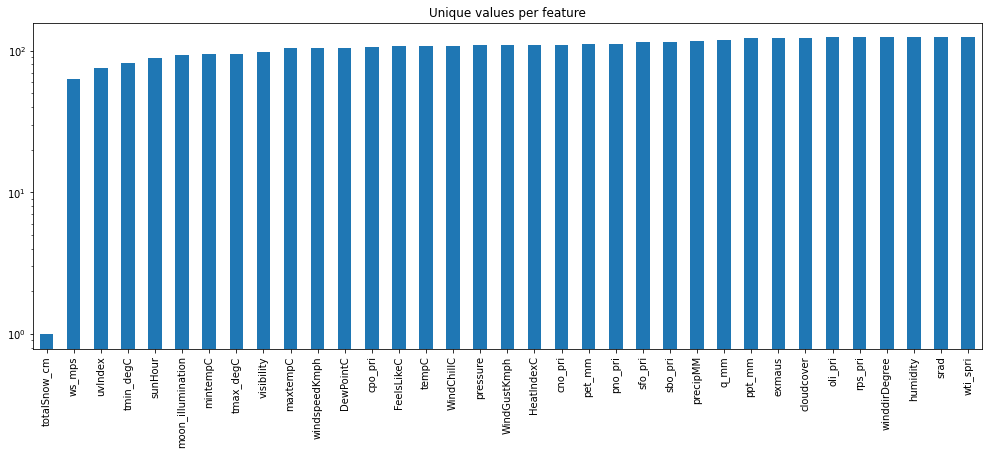

In [ ]:
# Compute number of unique entries for each numerical feature
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot numerical features with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(17, 6), title="Unique values per feature");

###Investigating Dataset Quality

The purpose is to have a comprehensive perspective of the dataset regarding duplicates, missing values, undesired entries, and recording mistakes.

###Duplicates

In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["tmax_degC"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


###Missing values

Missing values are another quality problem worth investigating. It is usual to have some missing data. At this step, we aim to find significant gaps in the dataset, i.e., samples or features with many missing values.

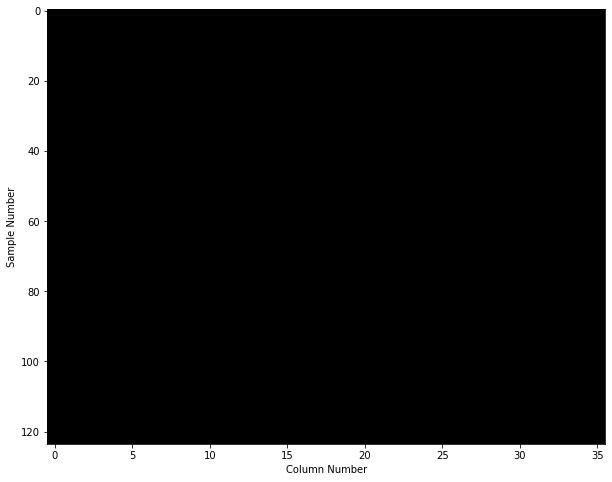

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This figure shows that there are no missing data

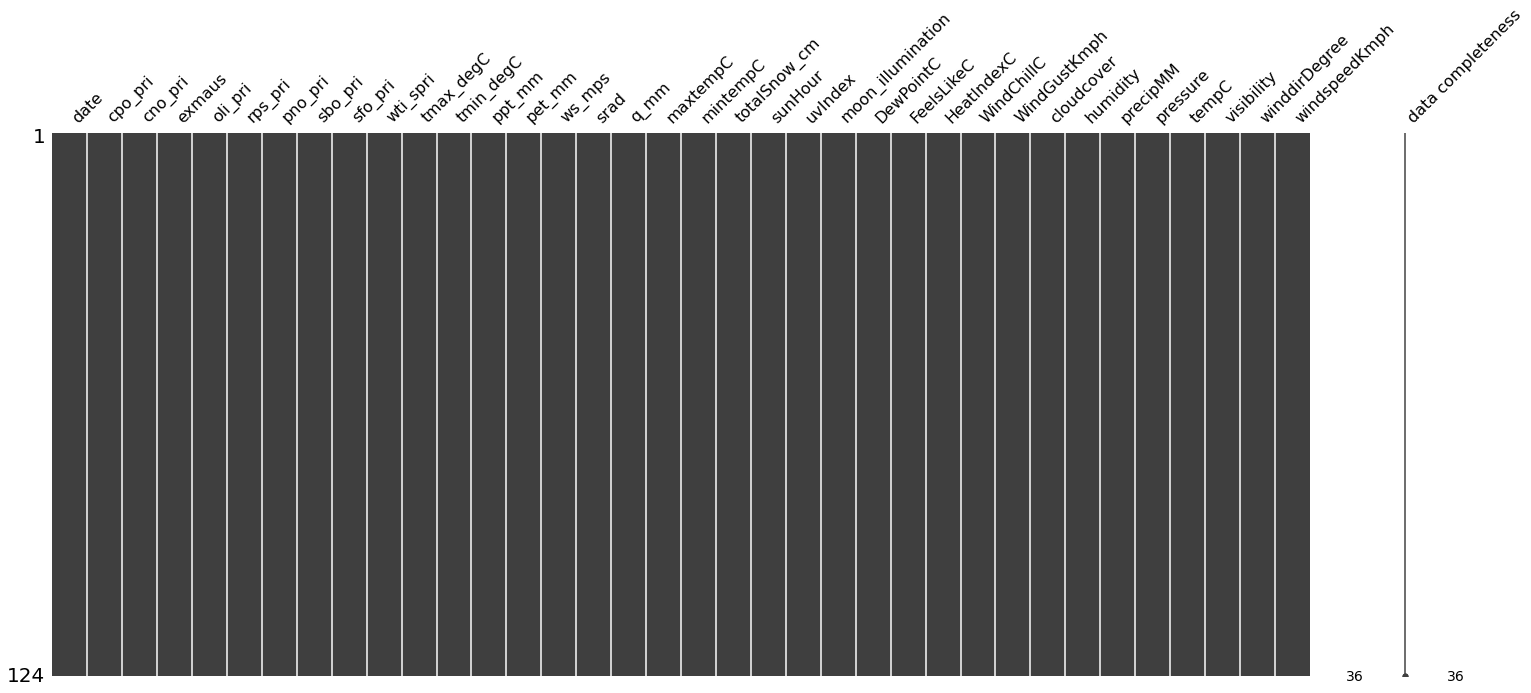

In [ ]:
#Applying missingno to flush out missing data
msno.matrix(df_X, labels=True, sort="descending");

####Percentage of missing data per feature

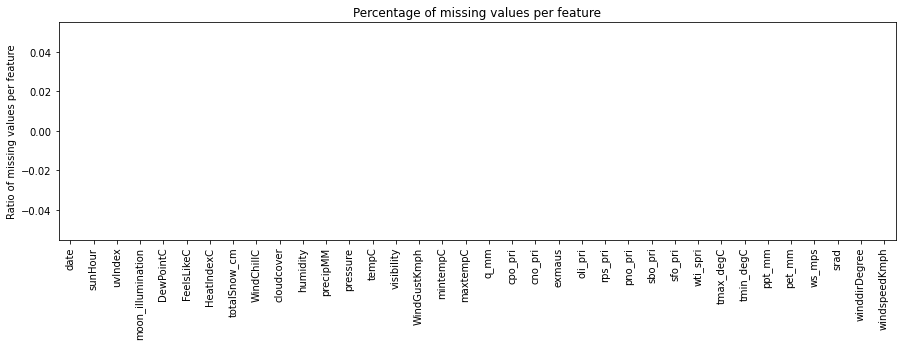

In [ ]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

This figure confirms that there are no missing data

#### Checking for unwanted entries and recording errors

Finding such mistakes and undesired entries and separating them from outliers is not always straightforward and mainly depends on the dataset. So our approach is to take a broad look at the dataset and see if we can see any out-of-the-ordinary trends.

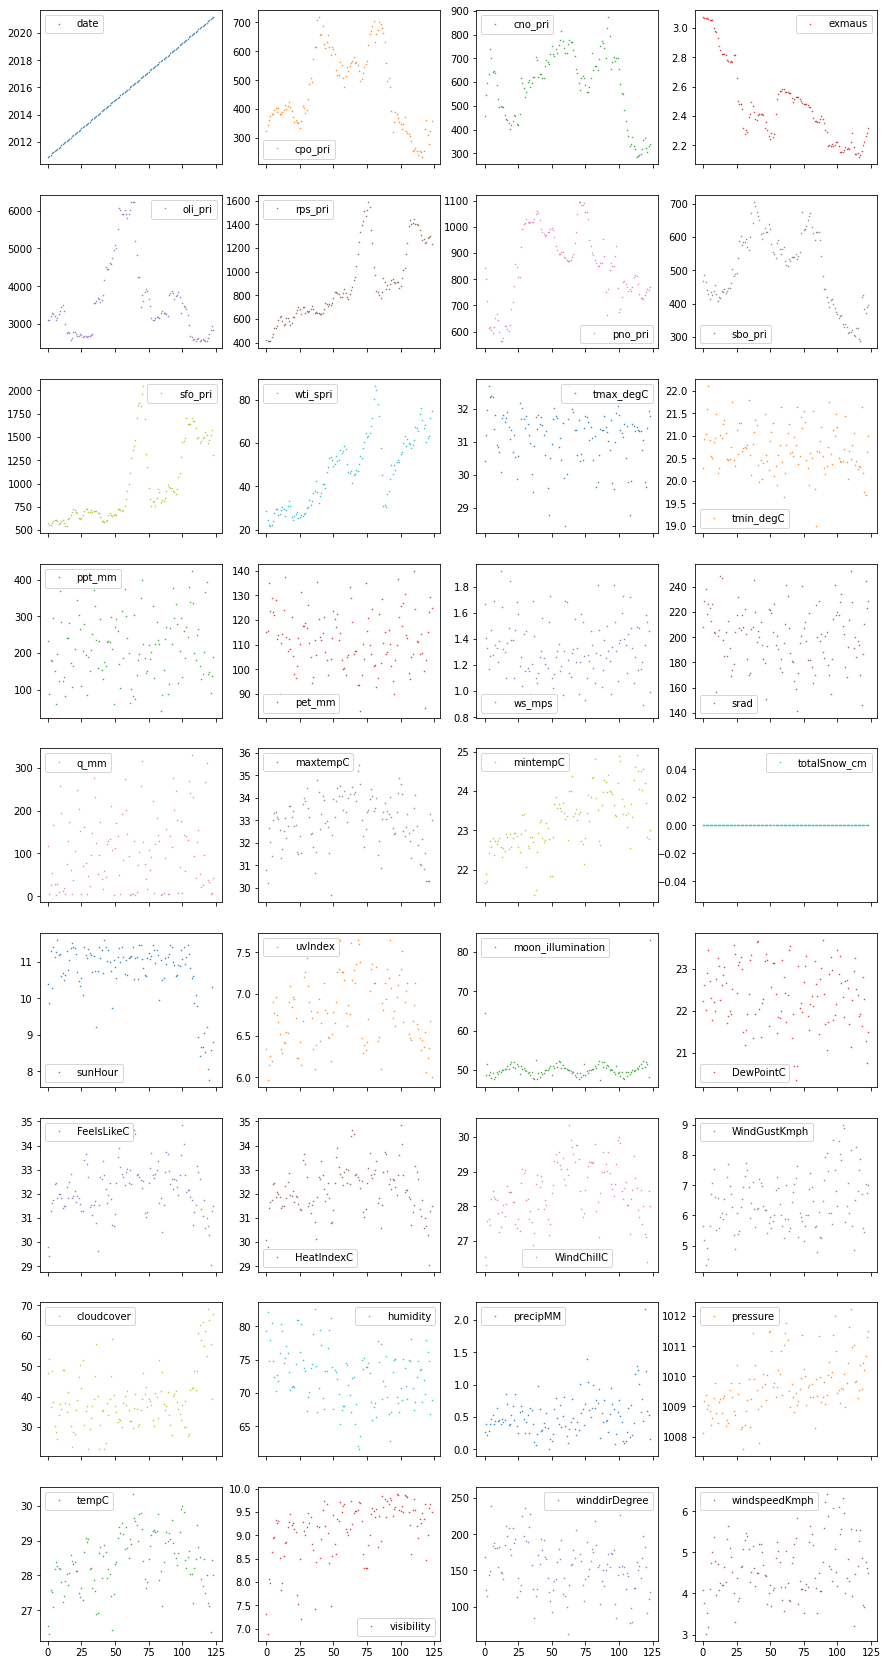

In [ ]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

###Content Investigation

Let's take it a step further and examine the actual material.



####Feature distribution

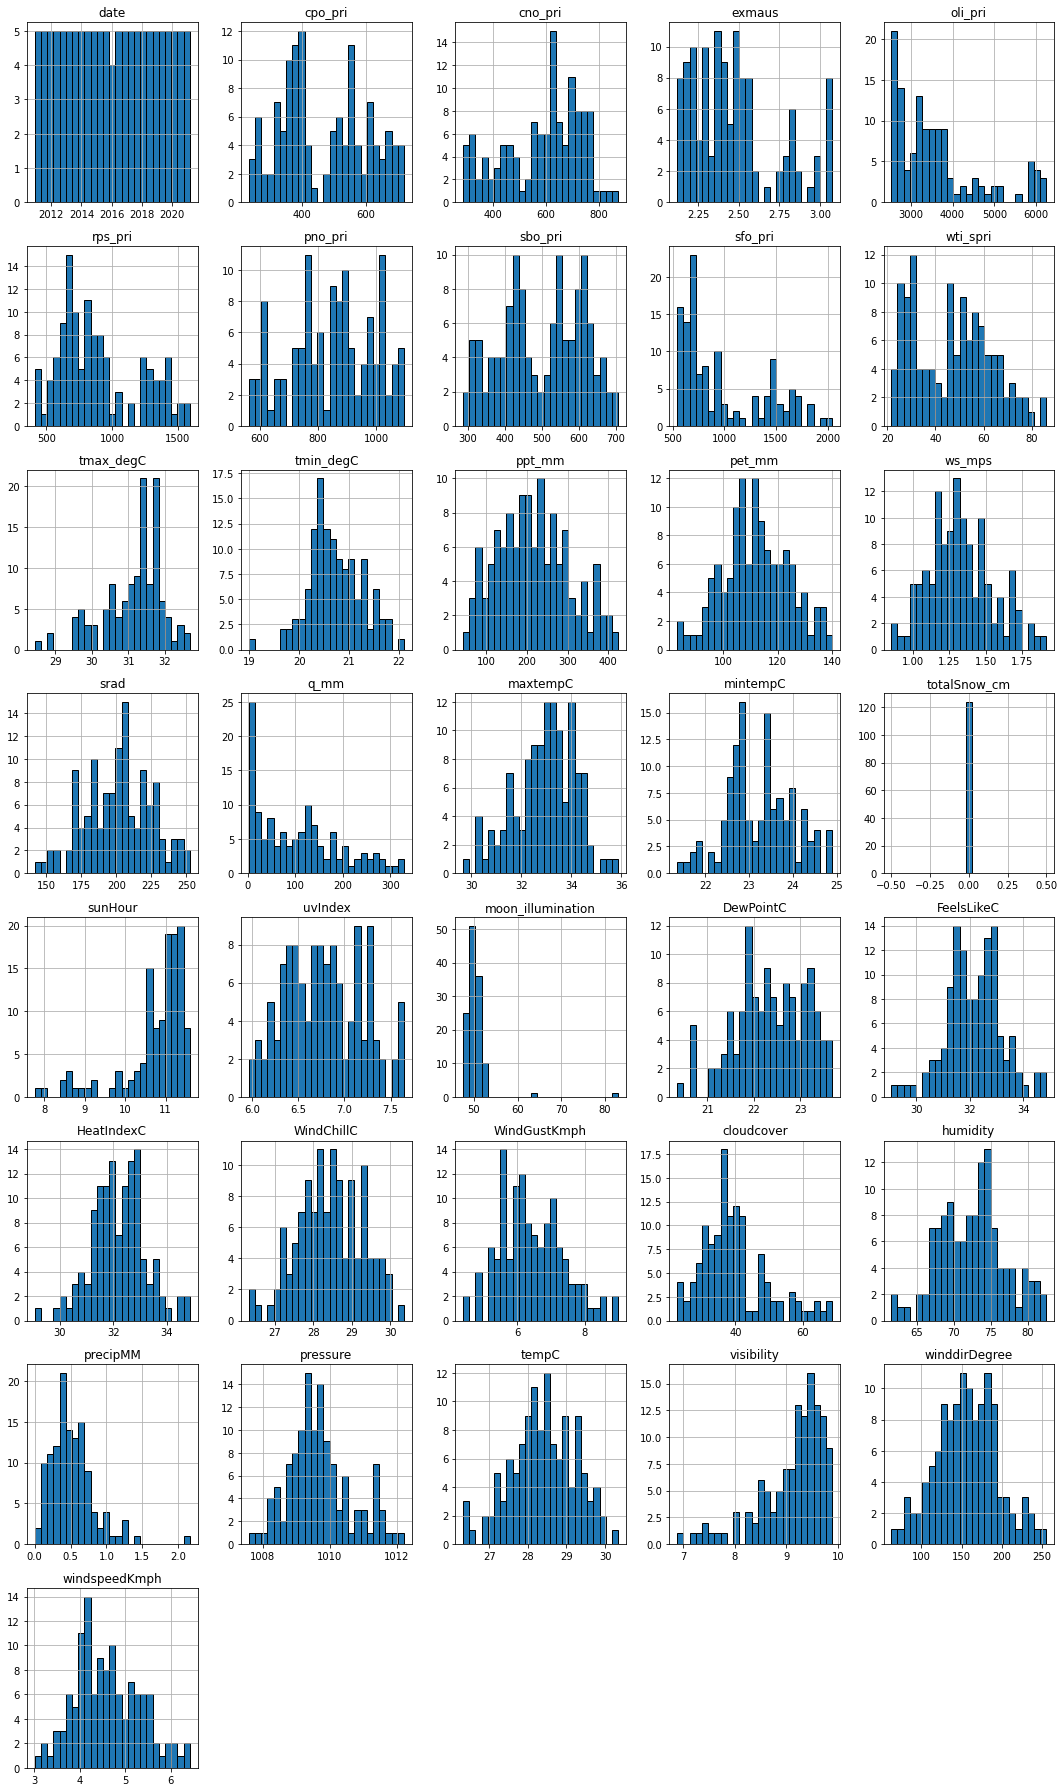

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

date            1.000000
rps_pri         0.072581
wti_spri        0.024194
cno_pri         0.008065
totalSnow_cm    0.008065
dtype: float64

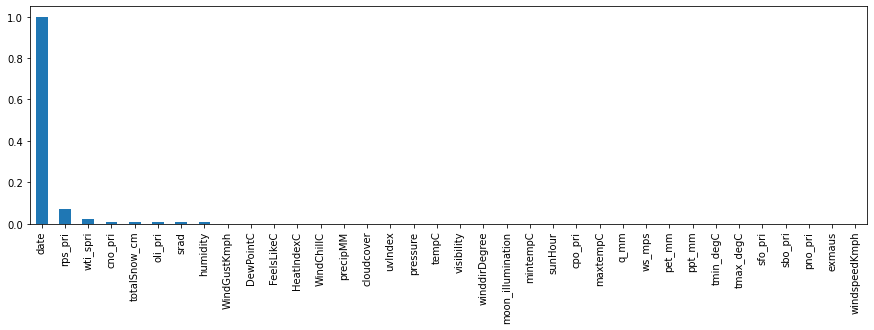

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [ ]:
'''
#Rename date to Date
df = df.rename(columns={'date':'Date'})
df.head()
'''

"\n#Rename date to Date\ndf = df.rename(columns={'date':'Date'})\ndf.head()\n"

###Checking for Outliers

####Compute the percentage of Outliers

In [ ]:
for k, v in df_X.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_X)[1]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column cpo_pri outliers = 0.00%
Column cno_pri outliers = 0.00%
Column exmaus outliers = 25.00%
Column oli_pri outliers = 36.11%
Column rps_pri outliers = 0.00%
Column pno_pri outliers = 0.00%
Column sbo_pri outliers = 0.00%
Column sfo_pri outliers = 0.00%
Column wti_spri outliers = 0.00%
Column tmax_degC outliers = 8.33%
Column tmin_degC outliers = 5.56%
Column ppt_mm outliers = 0.00%
Column pet_mm outliers = 0.00%
Column ws_mps outliers = 2.78%
Column srad outliers = 0.00%
Column q_mm outliers = 0.00%
Column maxtempC outliers = 2.78%
Column mintempC outliers = 0.00%
Column totalSnow_cm outliers = 344.44%
Column sunHour outliers = 33.33%
Column uvIndex outliers = 0.00%
Column moon_illumination outliers = 5.56%
Column DewPointC outliers = 0.00%
Column FeelsLikeC outliers = 8.33%
Column HeatIndexC outliers = 8.33%
Column WindChillC outliers = 0.00%
Column WindGustKmph outliers = 0.00%
Column cloudcover outliers = 25.00%
Column humidity outliers = 0.00%
Column precipMM outliers = 16.67%


Outliers were detected on these features: 
*   exmaus
*   oli_pri
*   tmax_degC
*   tmin_degC
*   ws_mps
*   maxtempC
*   totalSnow_cm
*   sunHour
*   moon_illumination 
*   FeelsLikeC
*   HeatIndexC
*   cloudcover
*   precipMM
*   pressure
*   visibility




In [ ]:
df_X.set_index('date', inplace=True)

###Plot all the the Variables with Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

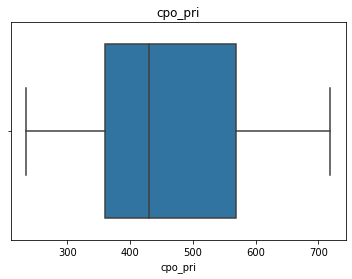

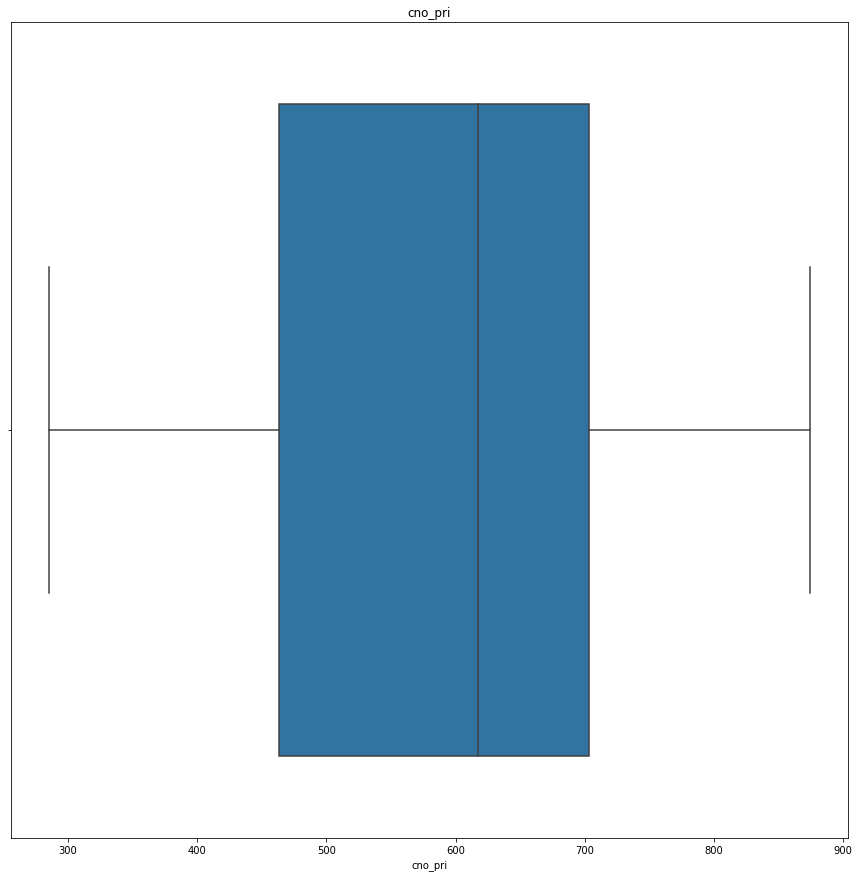

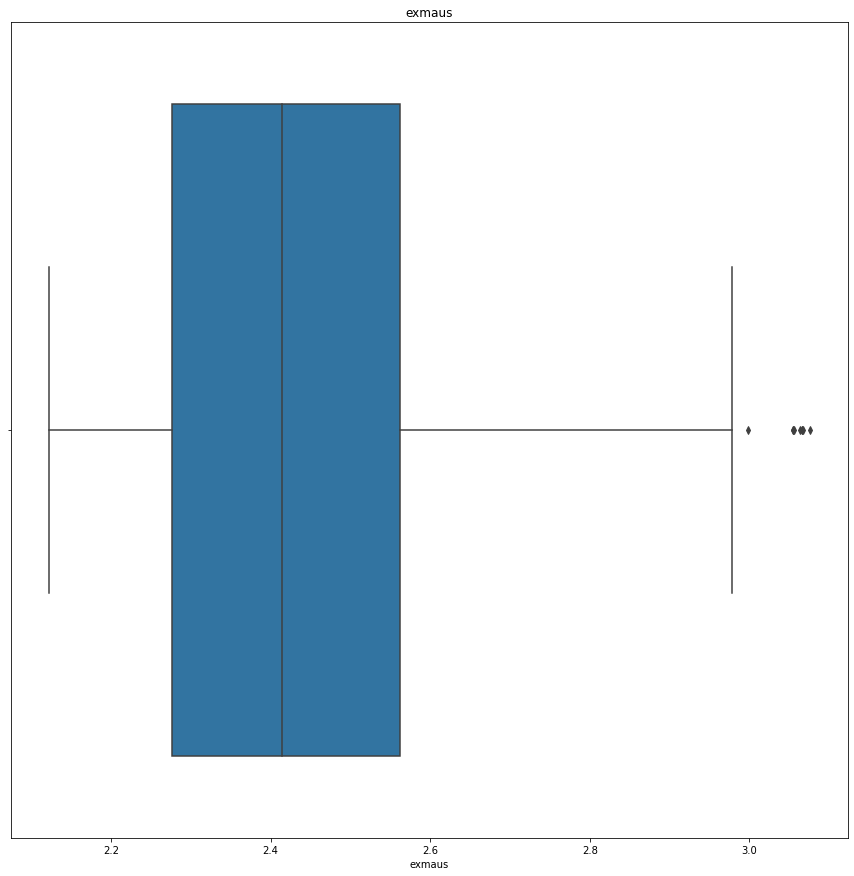

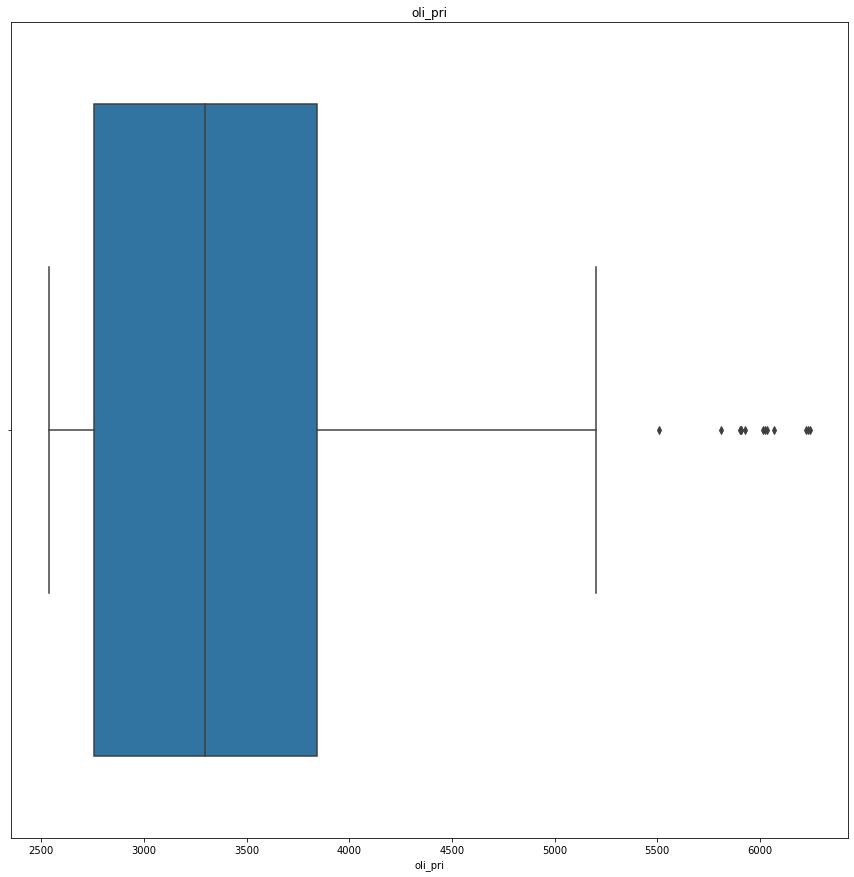

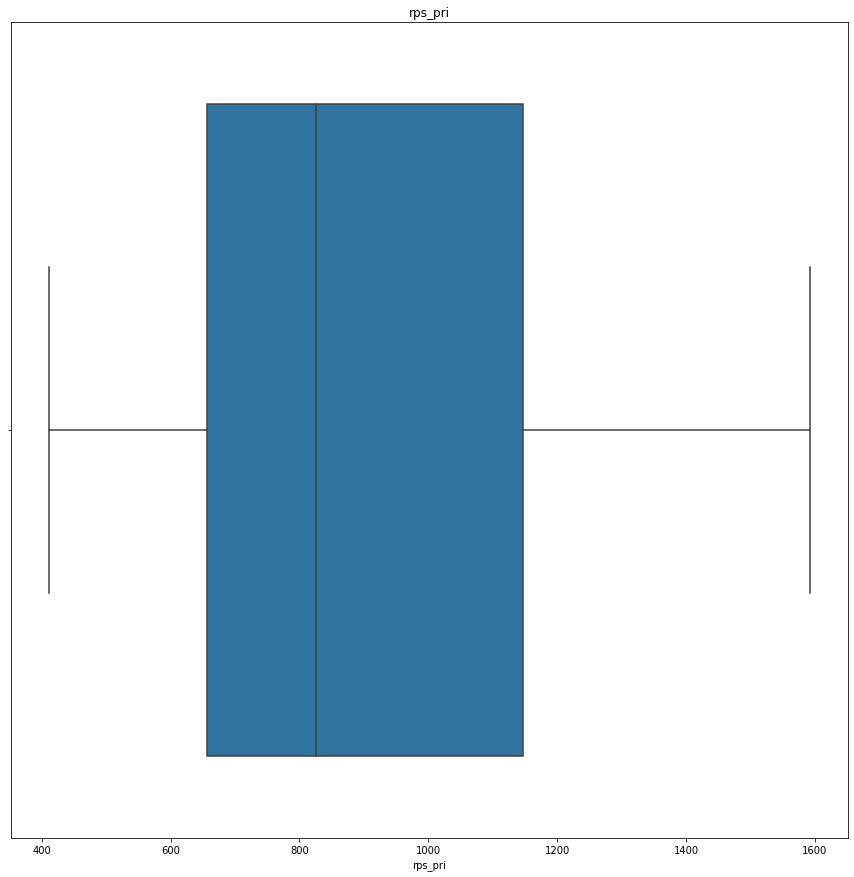

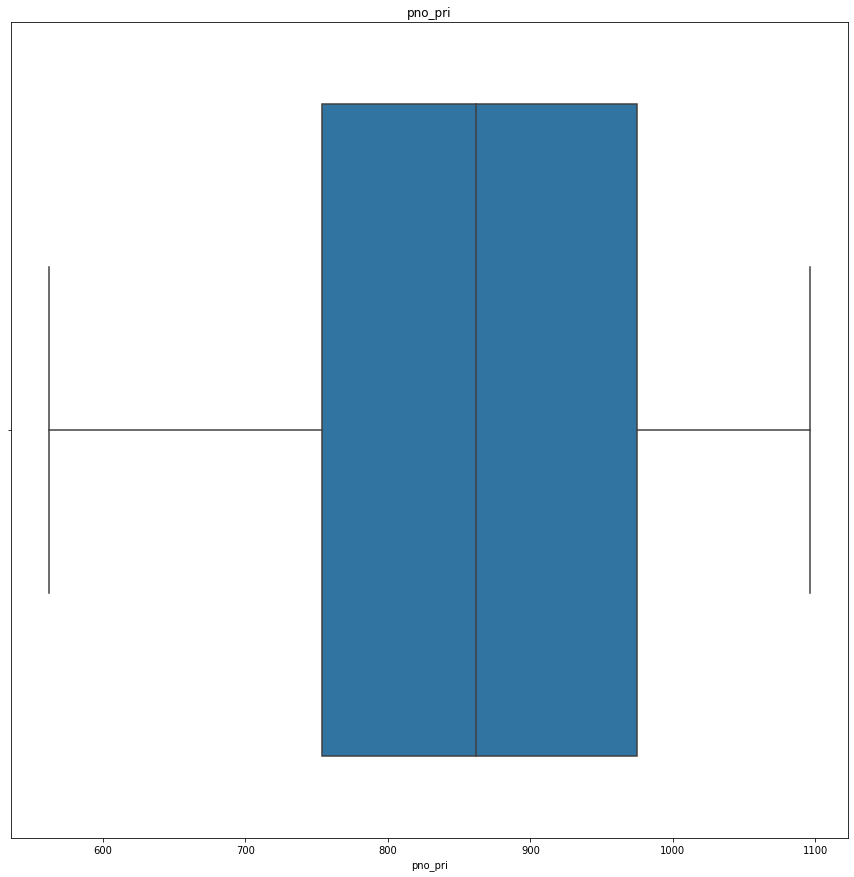

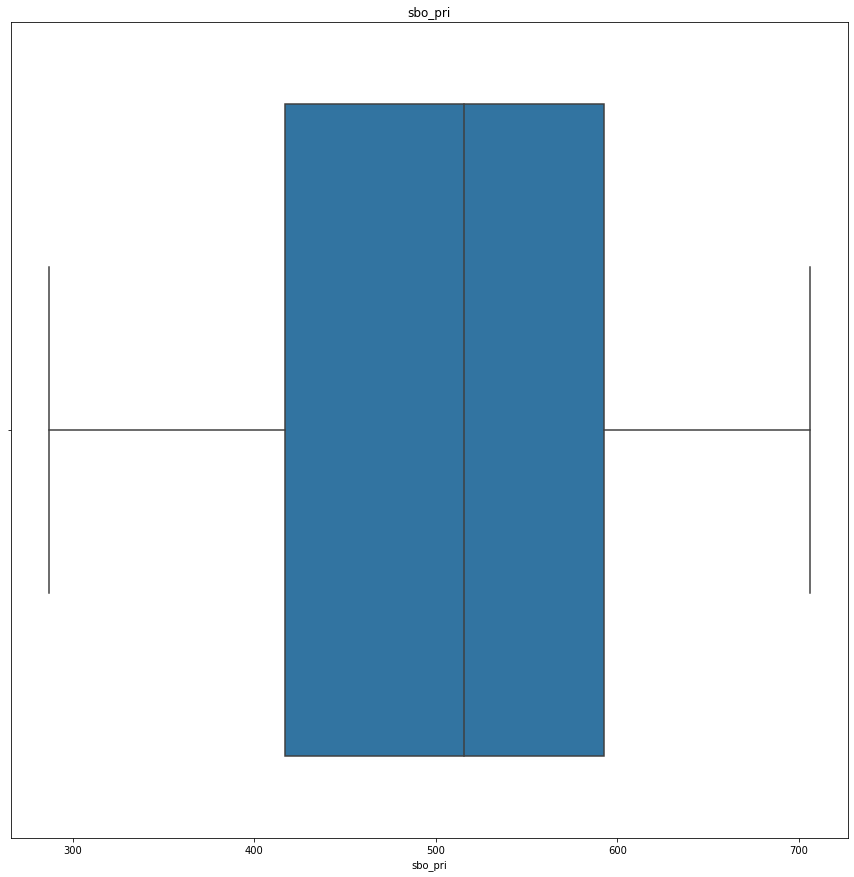

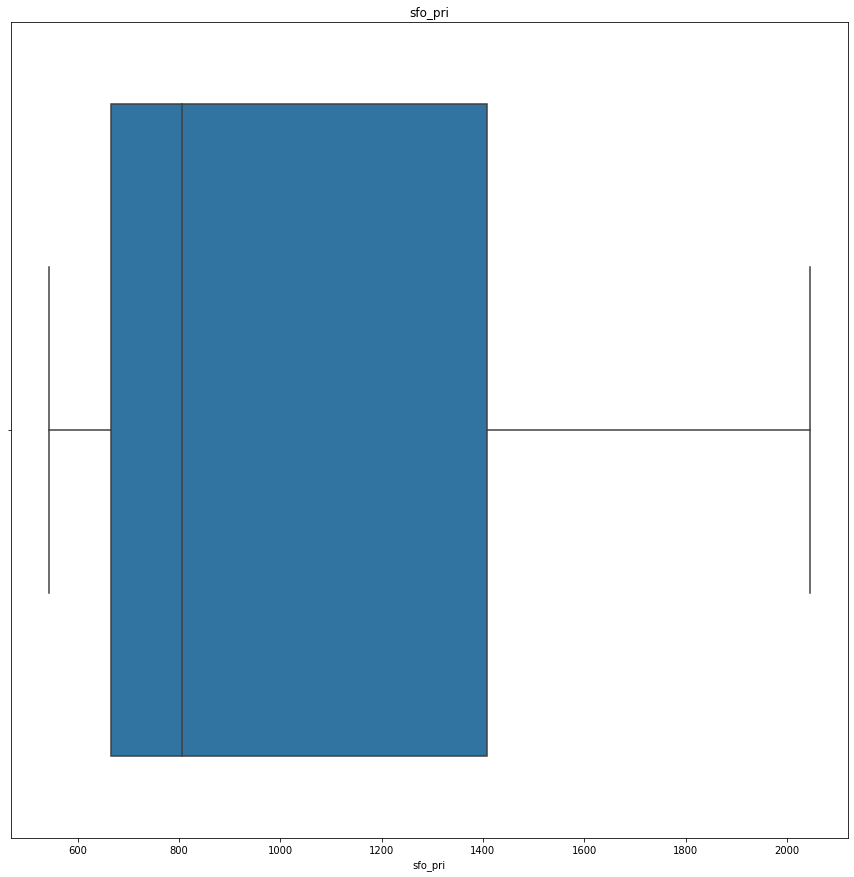

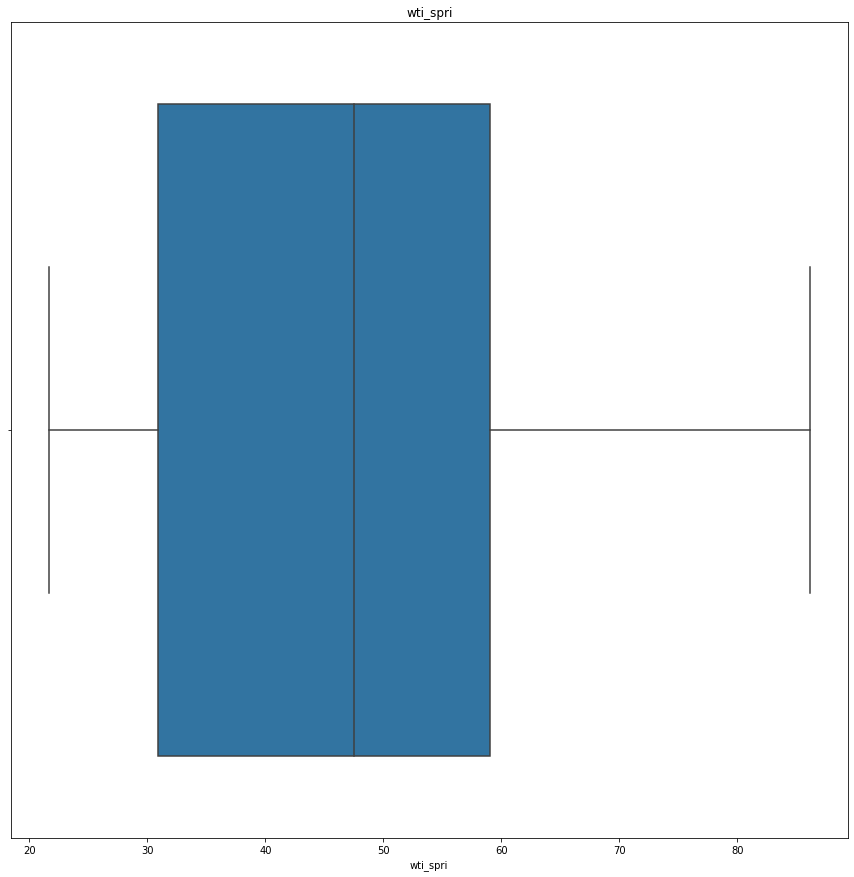

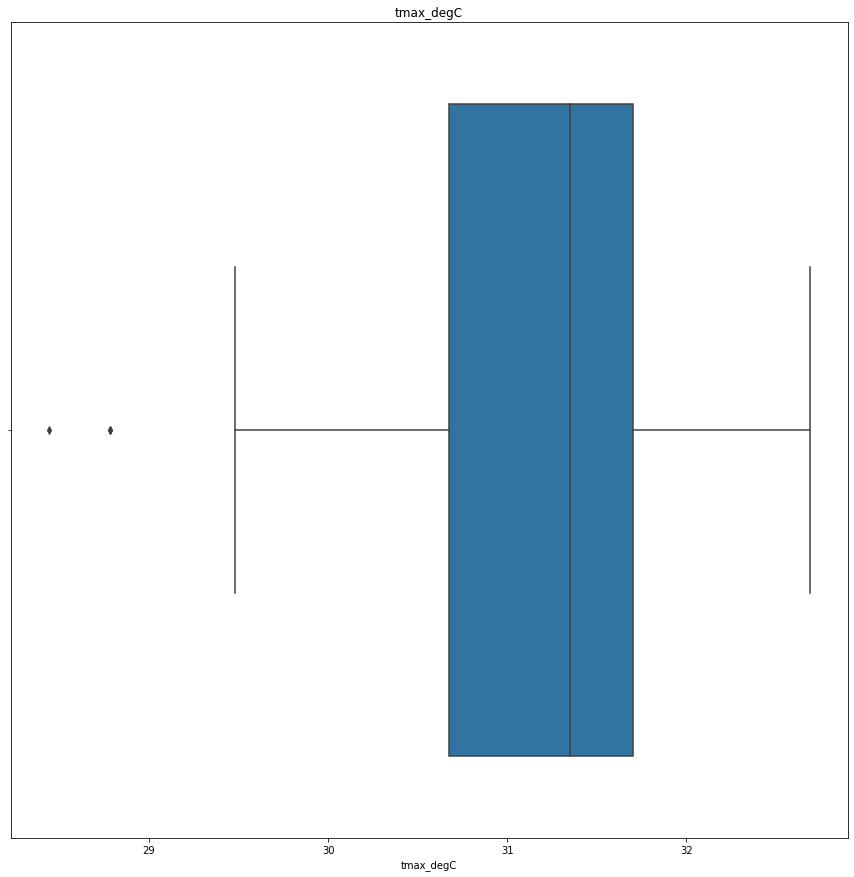

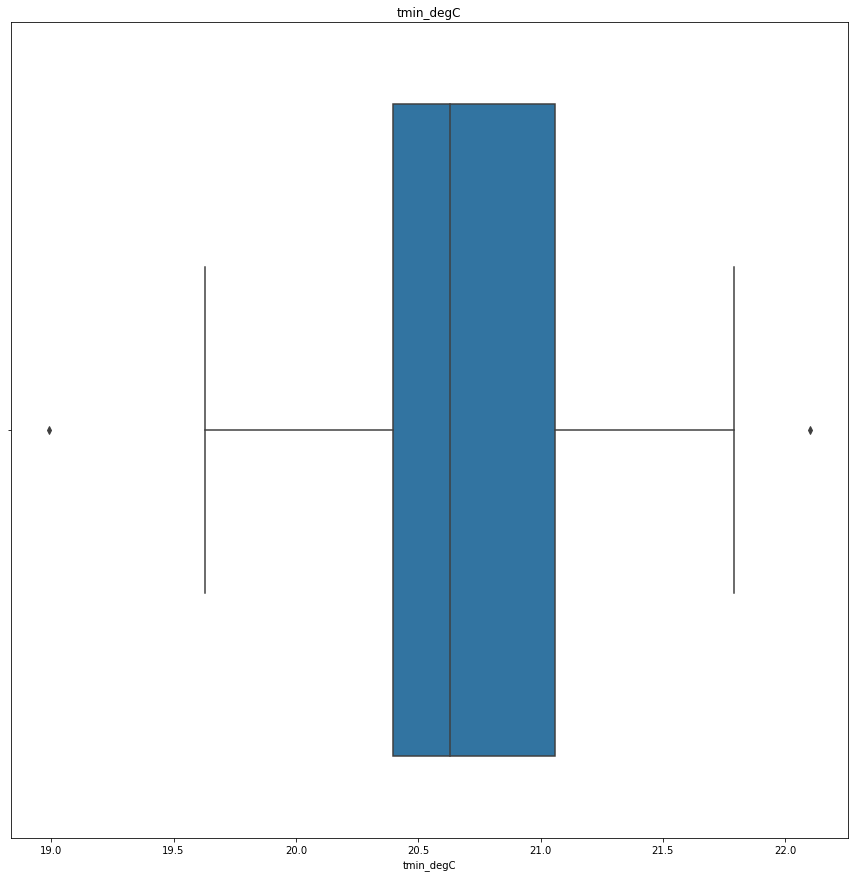

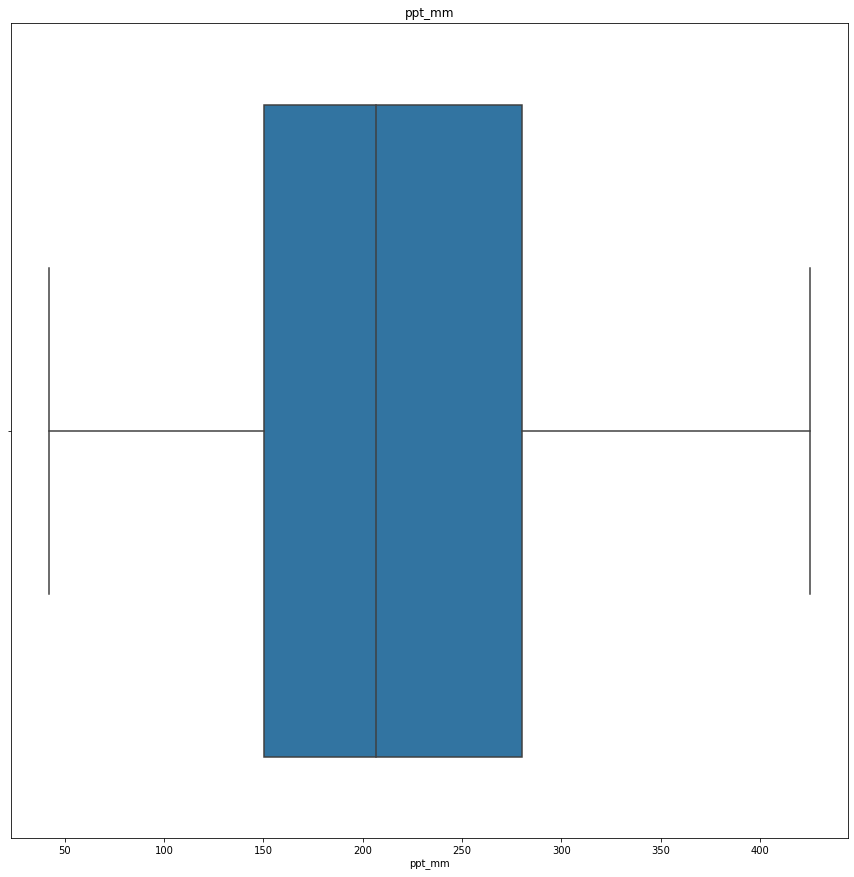

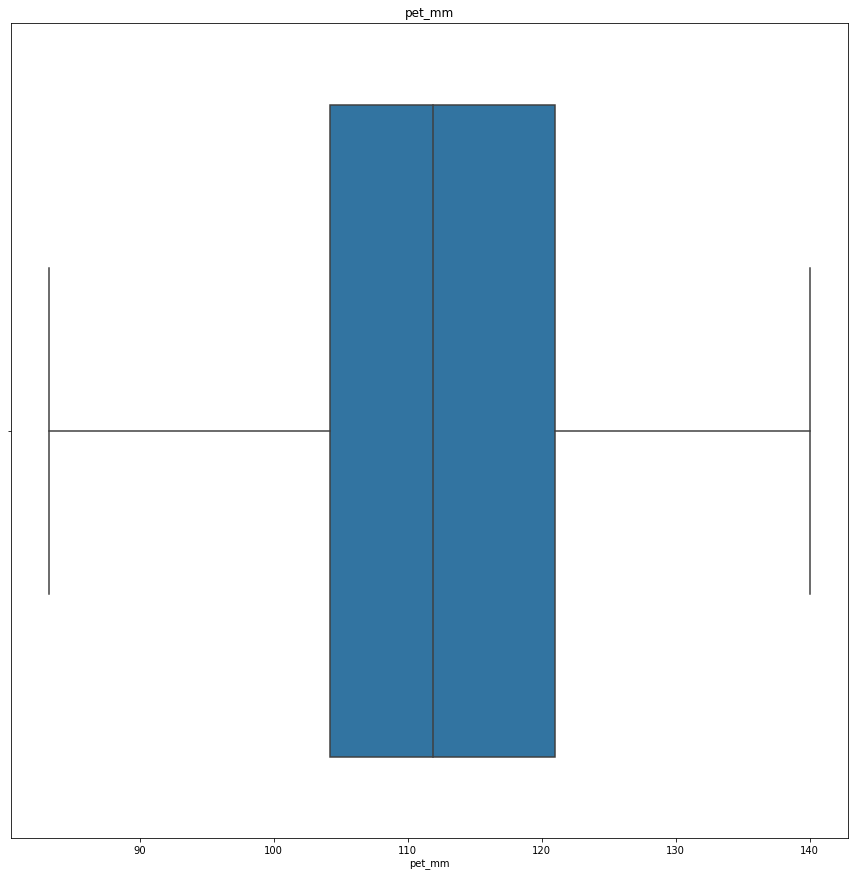

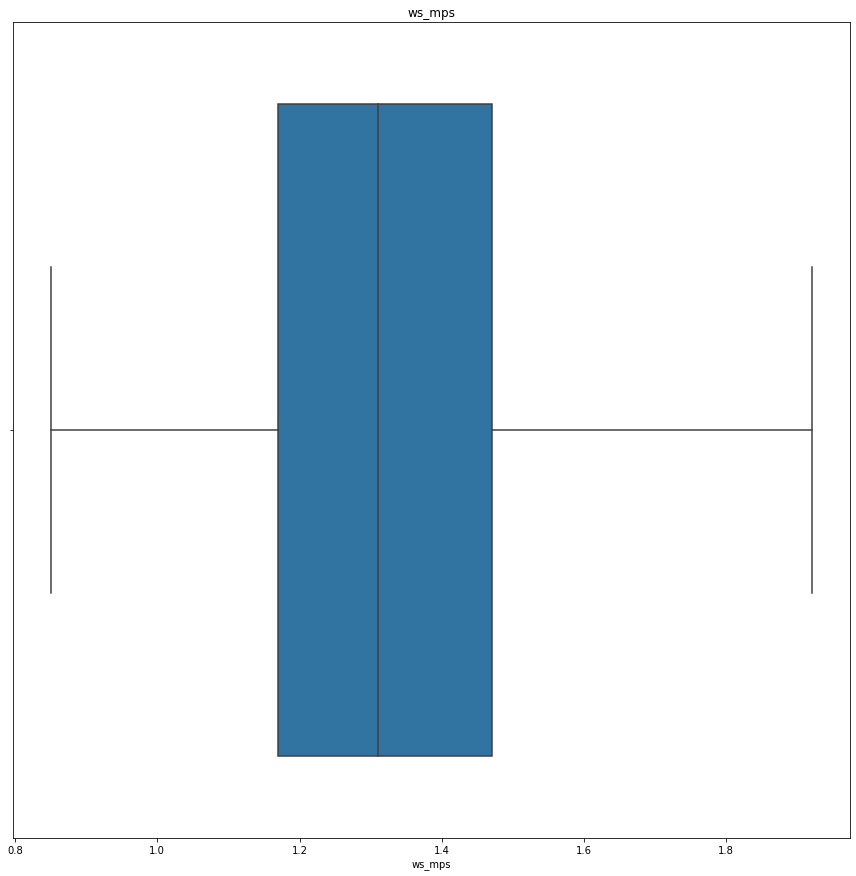

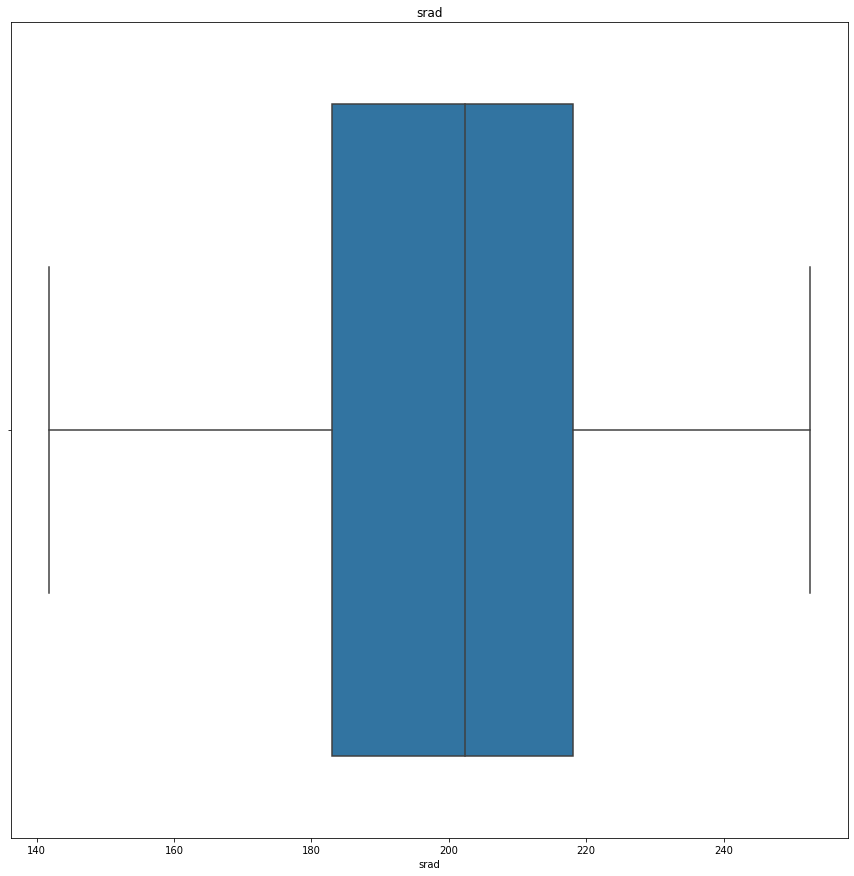

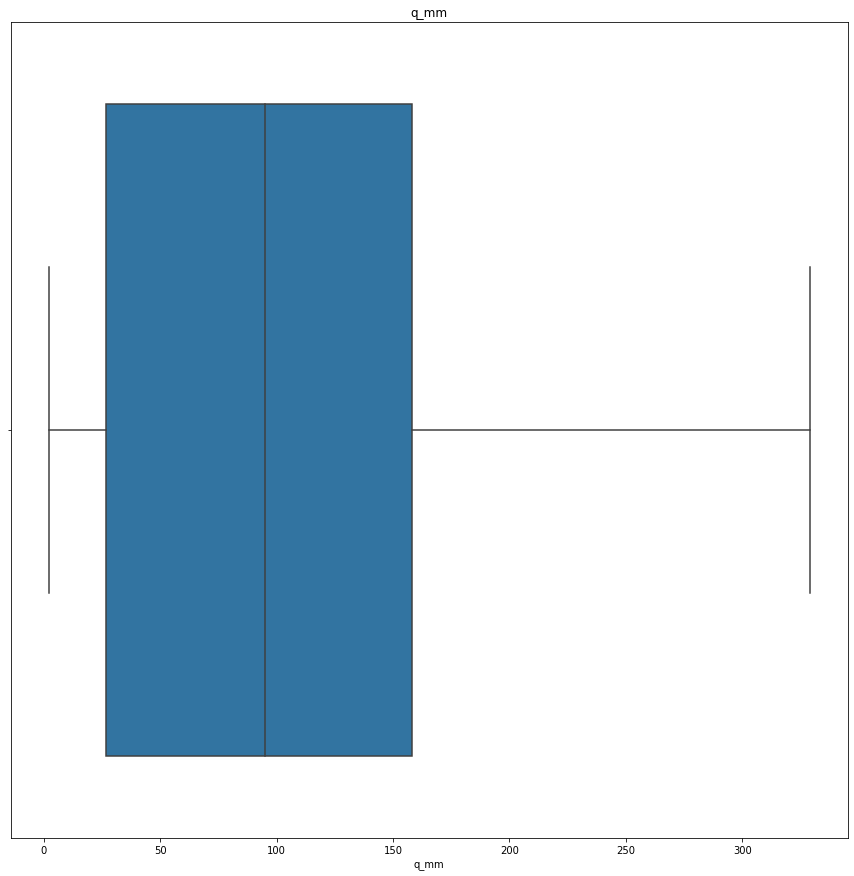

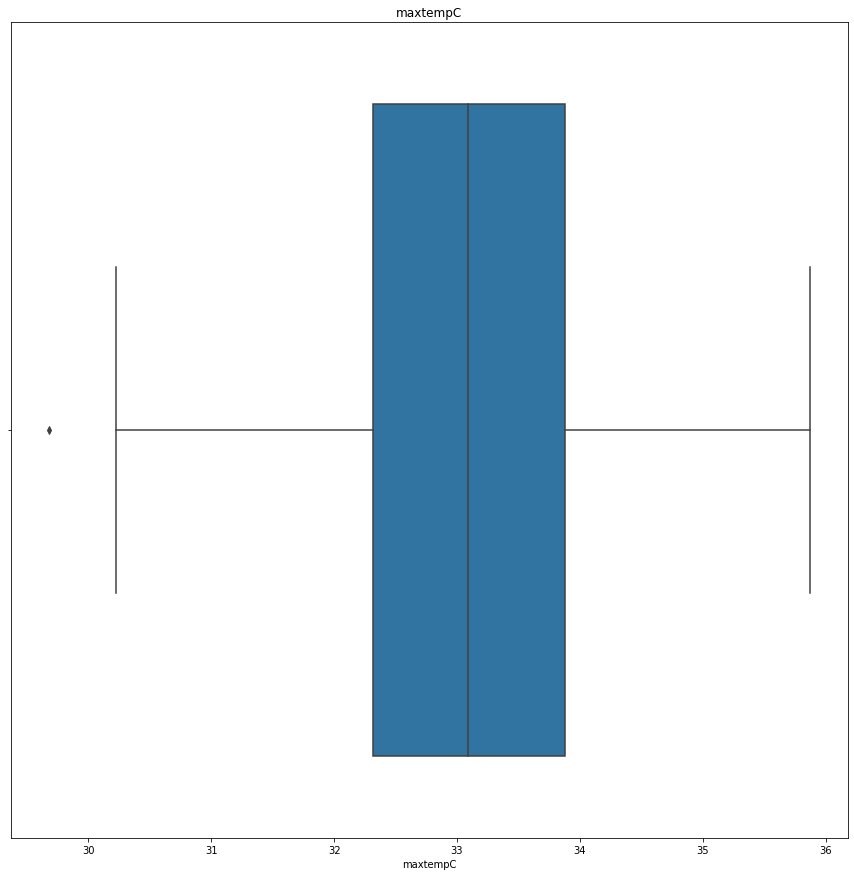

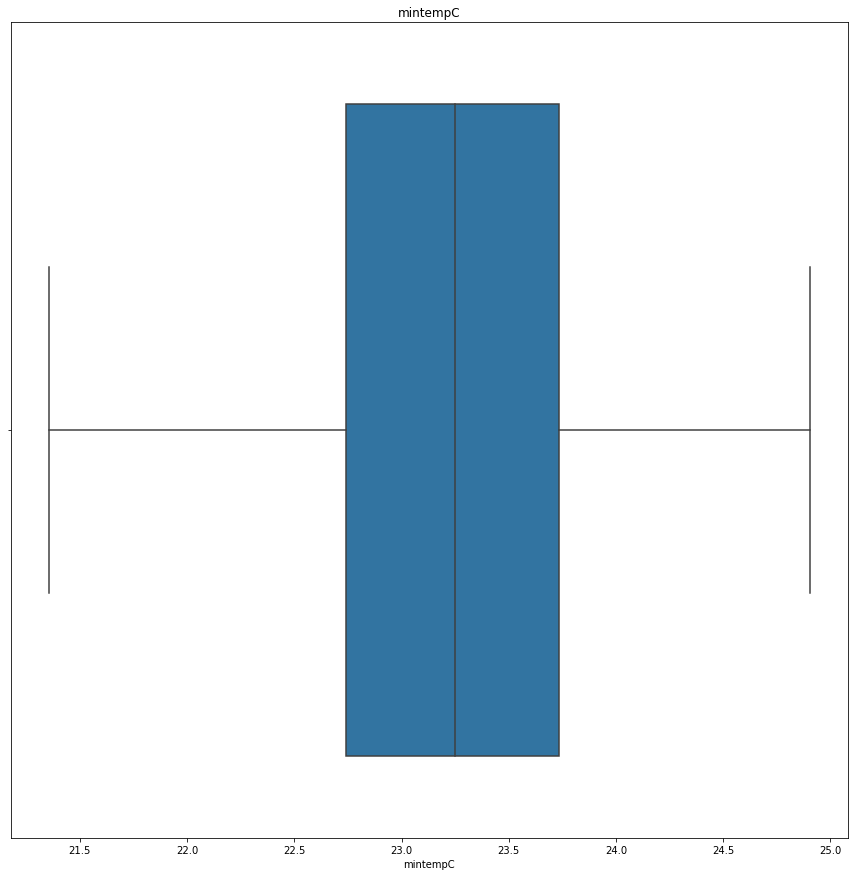

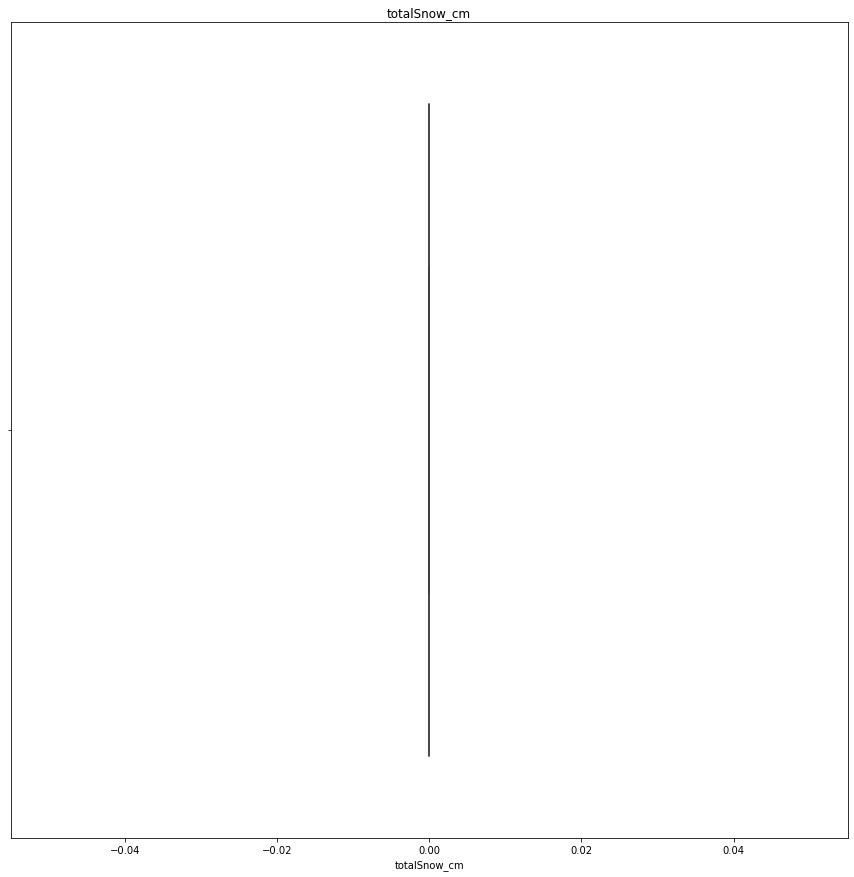

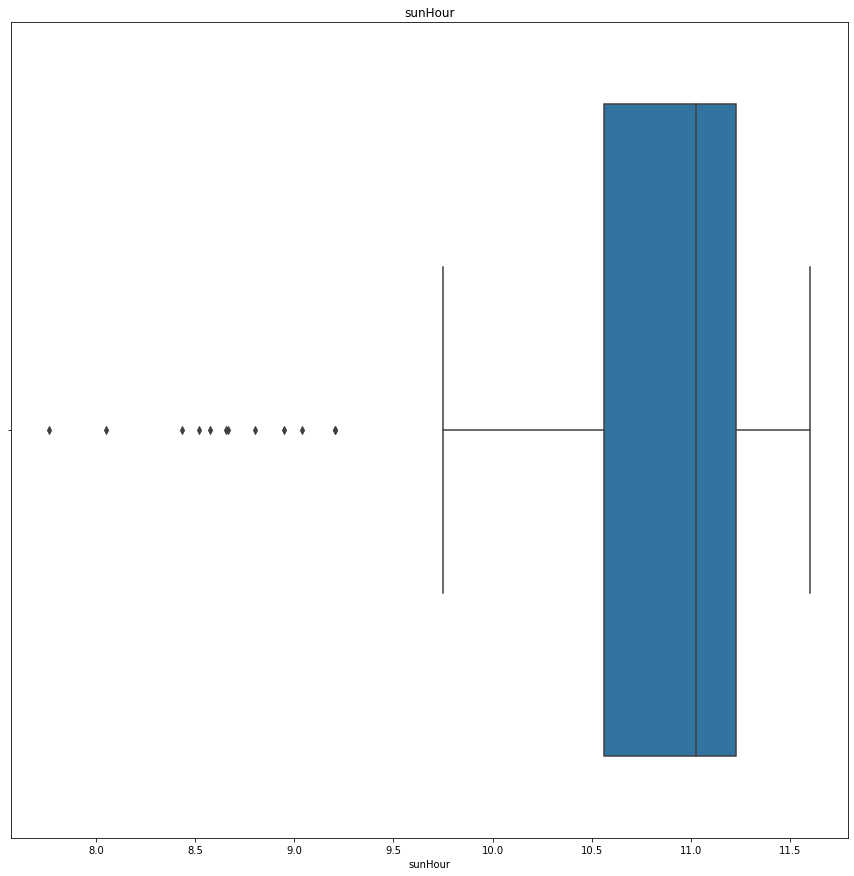

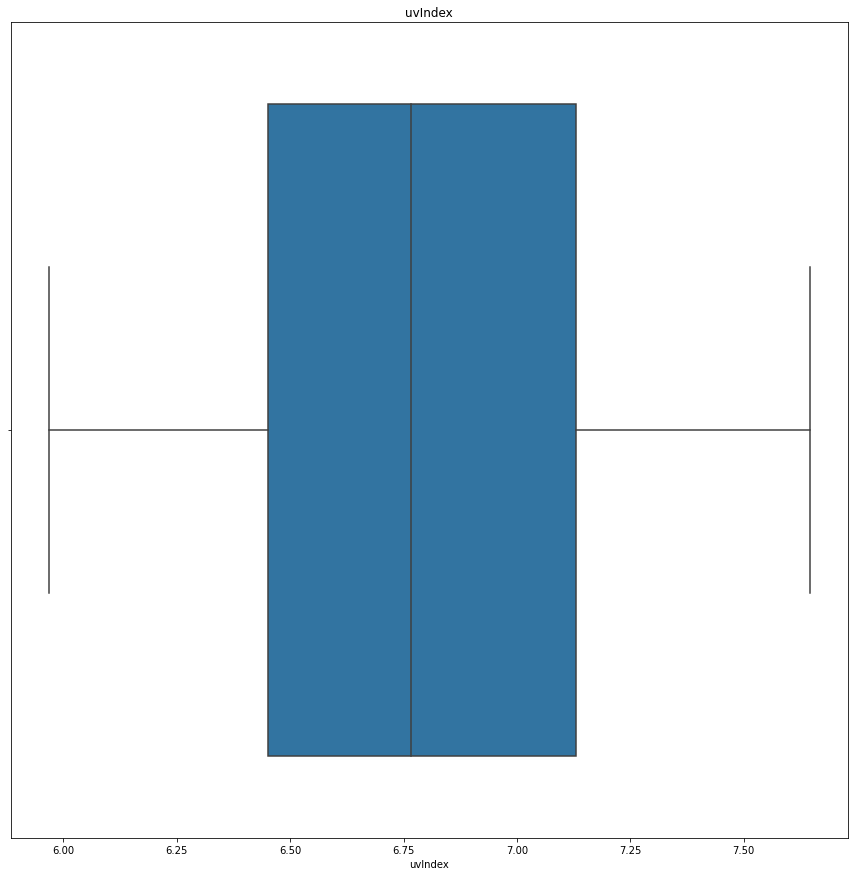

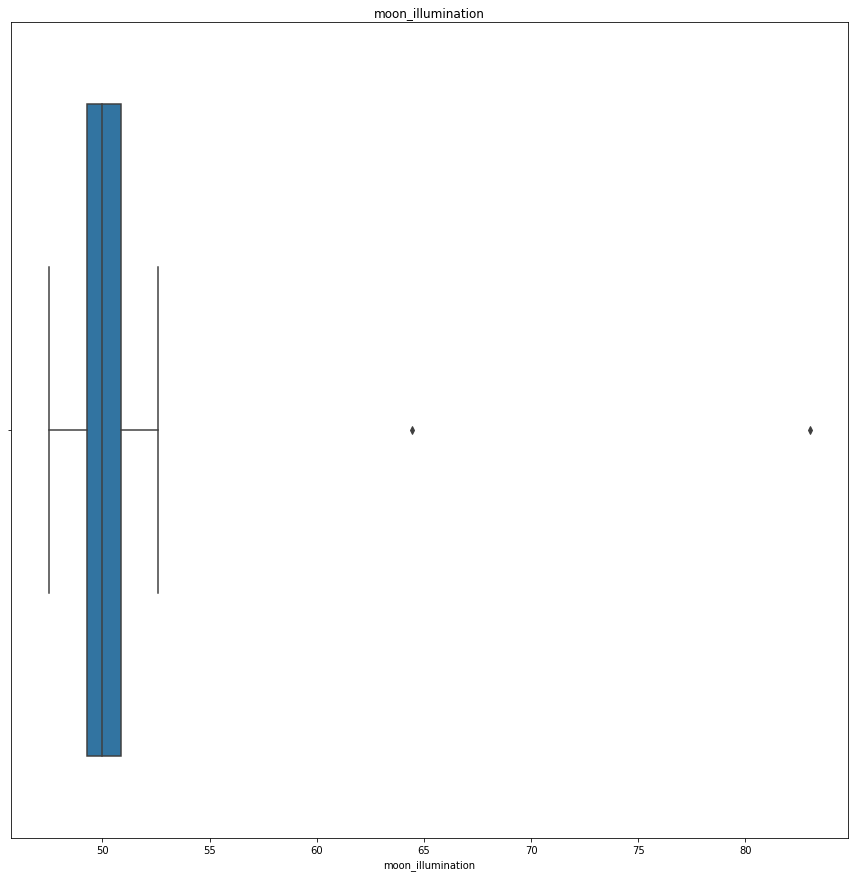

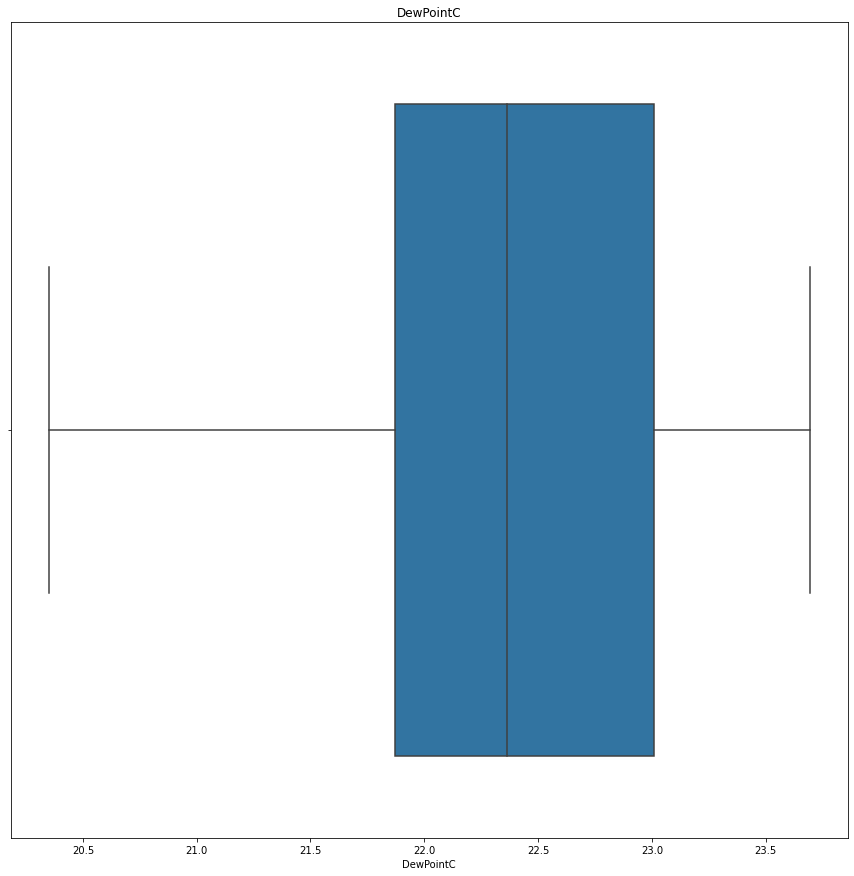

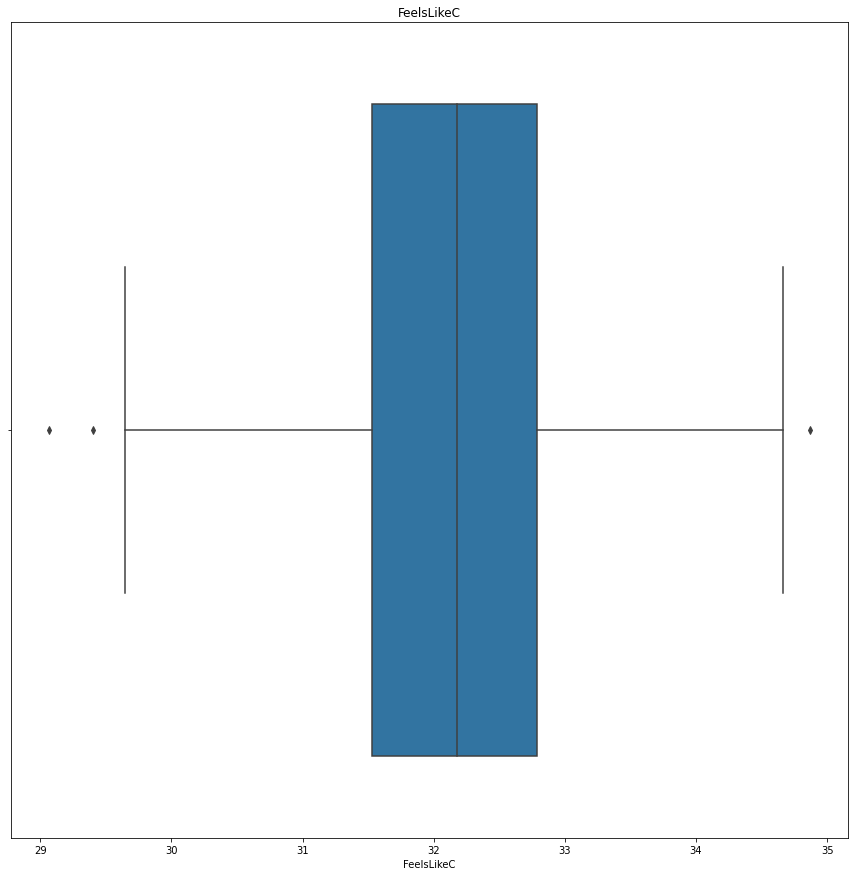

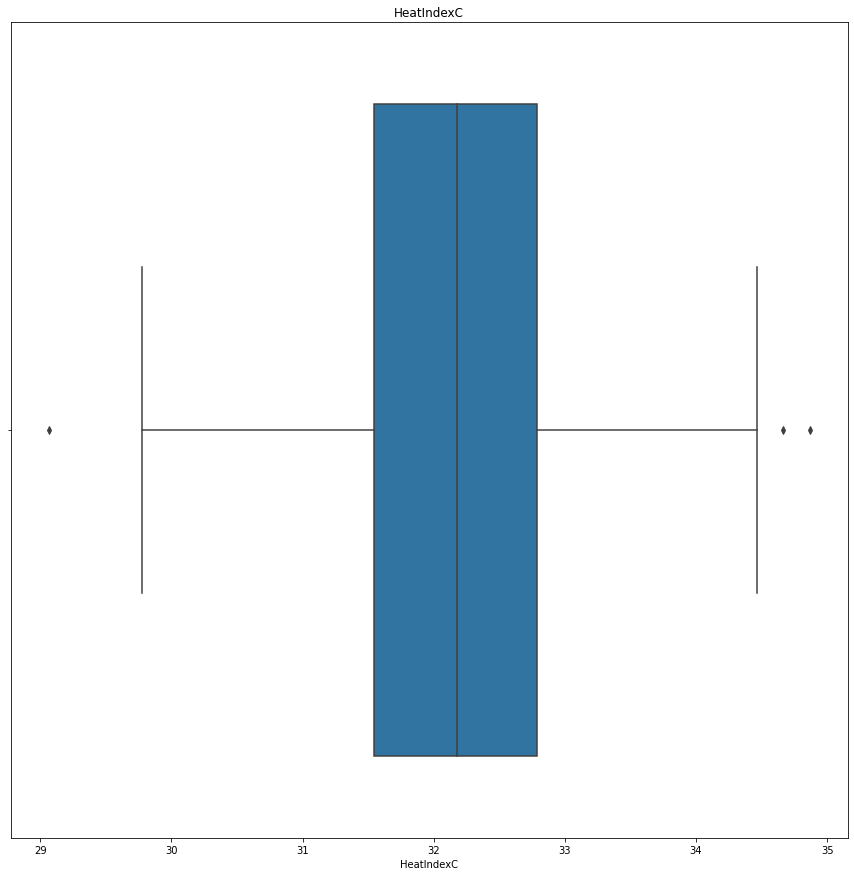

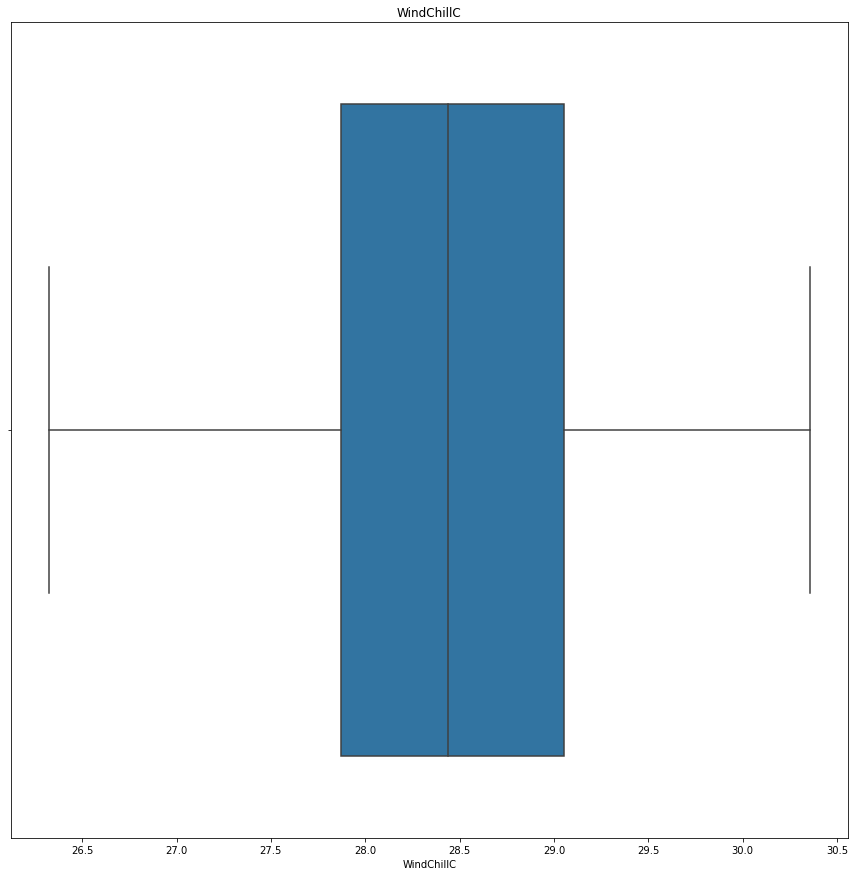

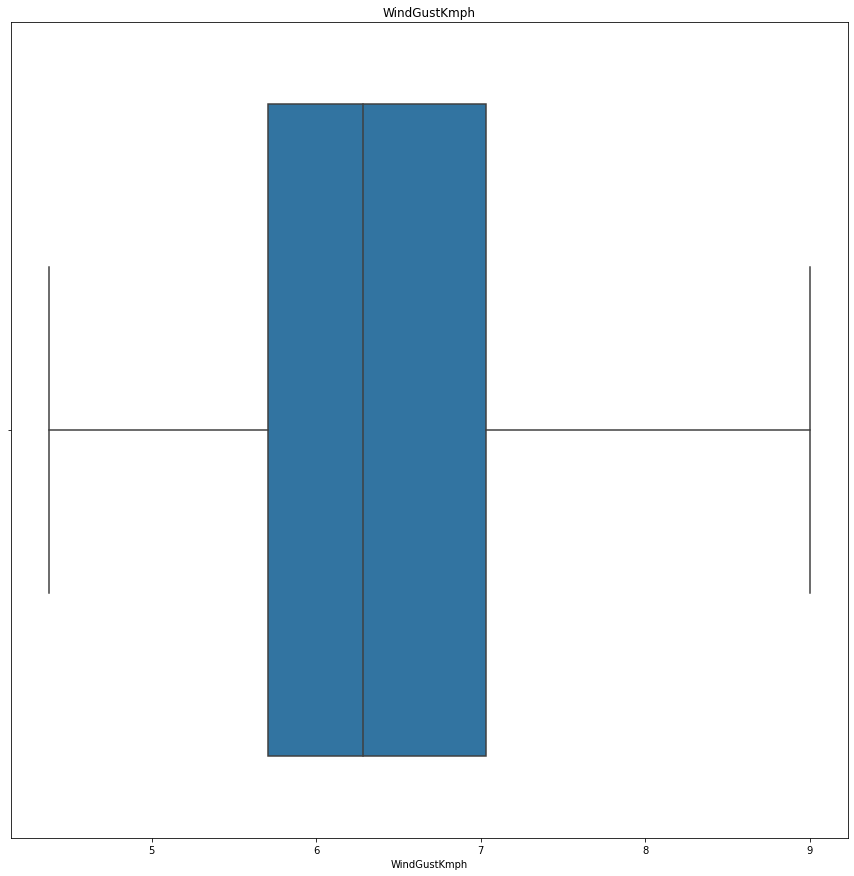

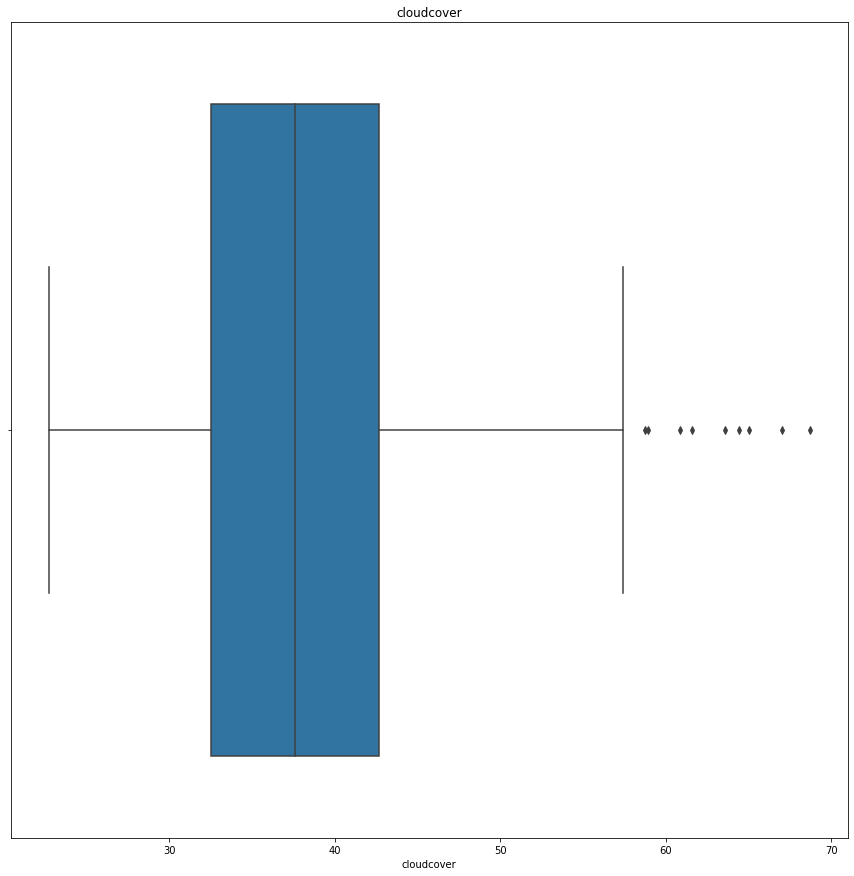

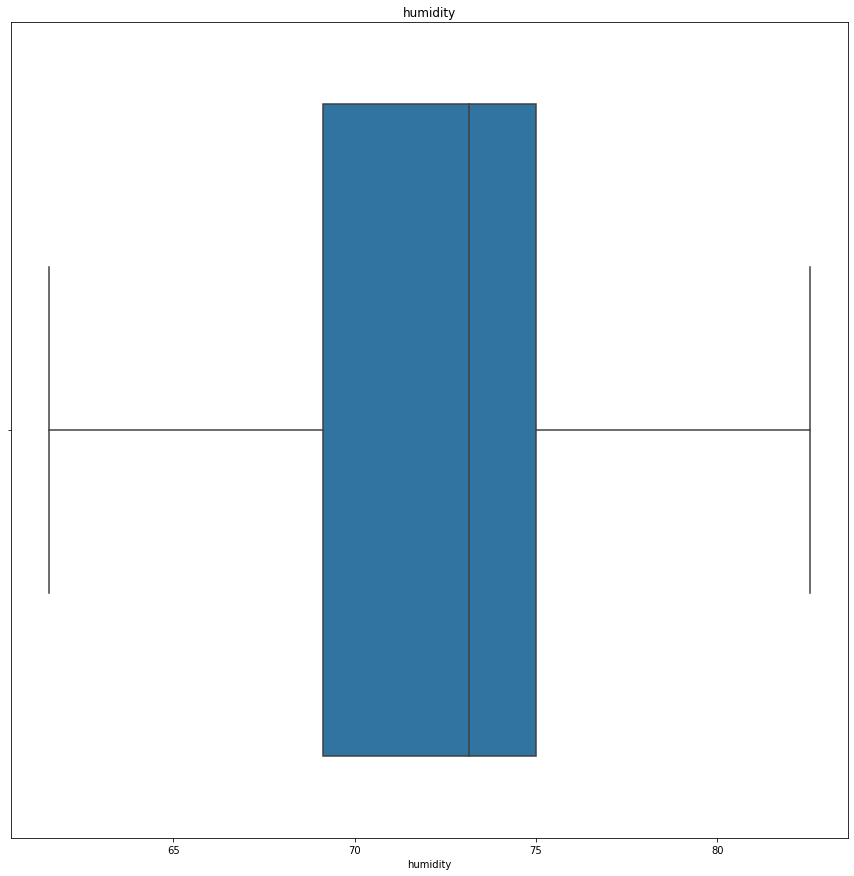

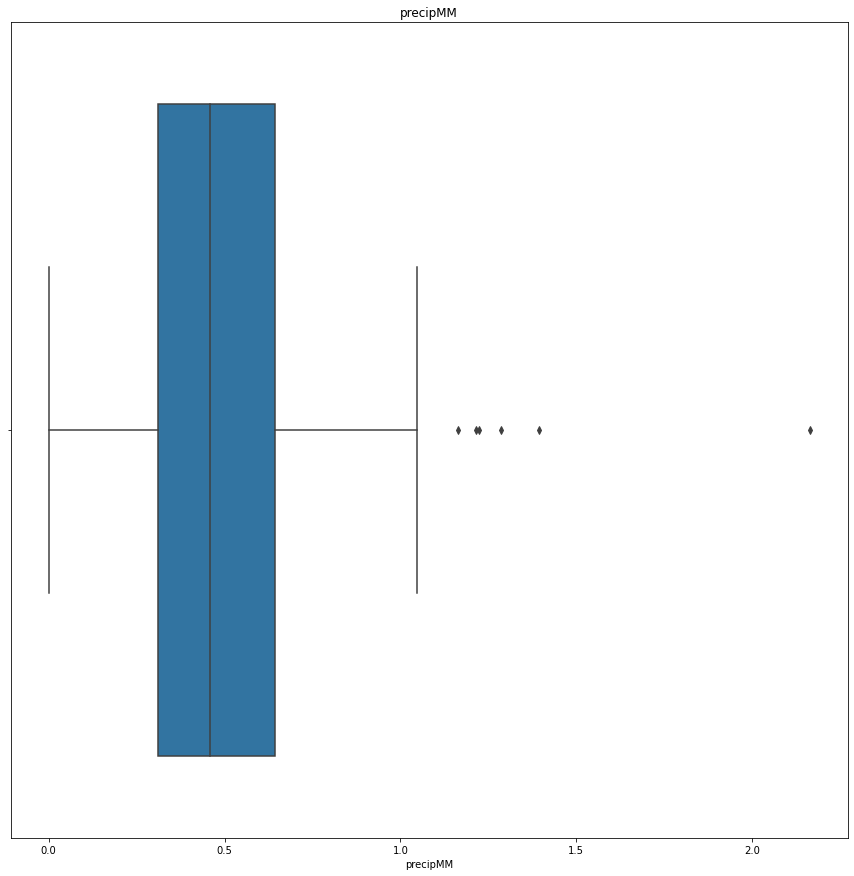

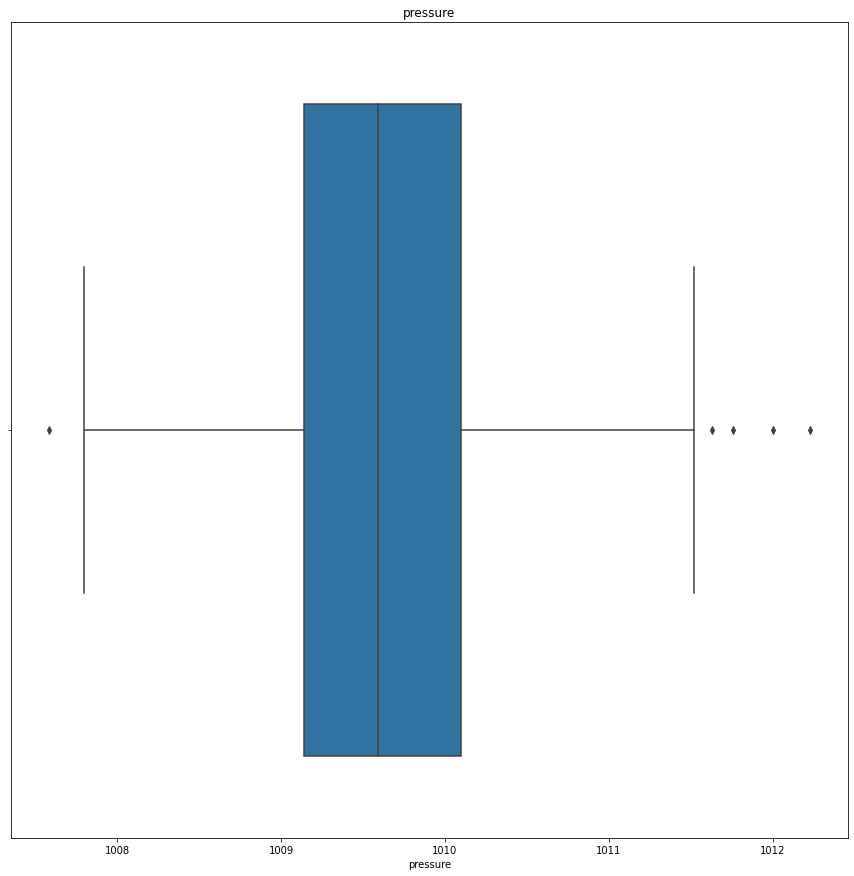

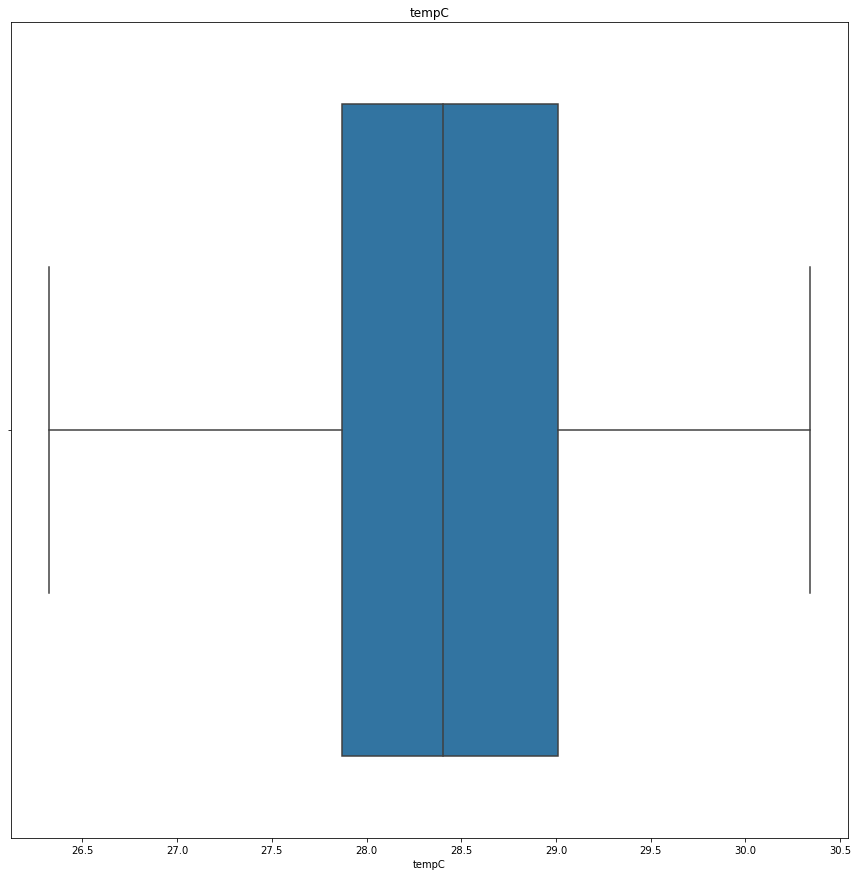

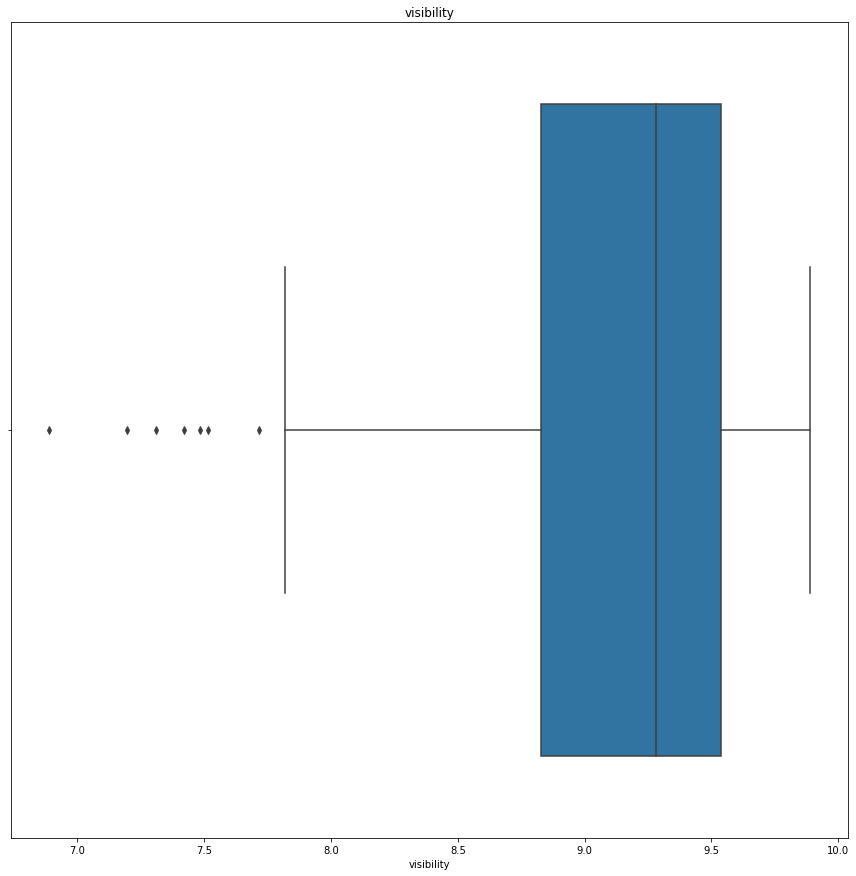

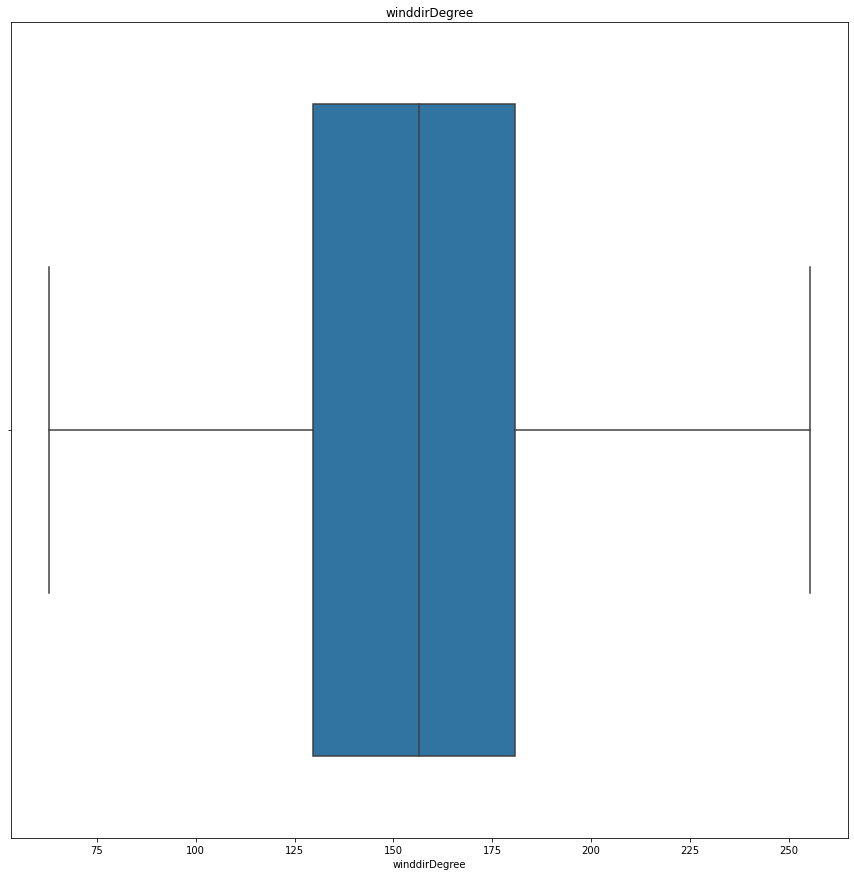

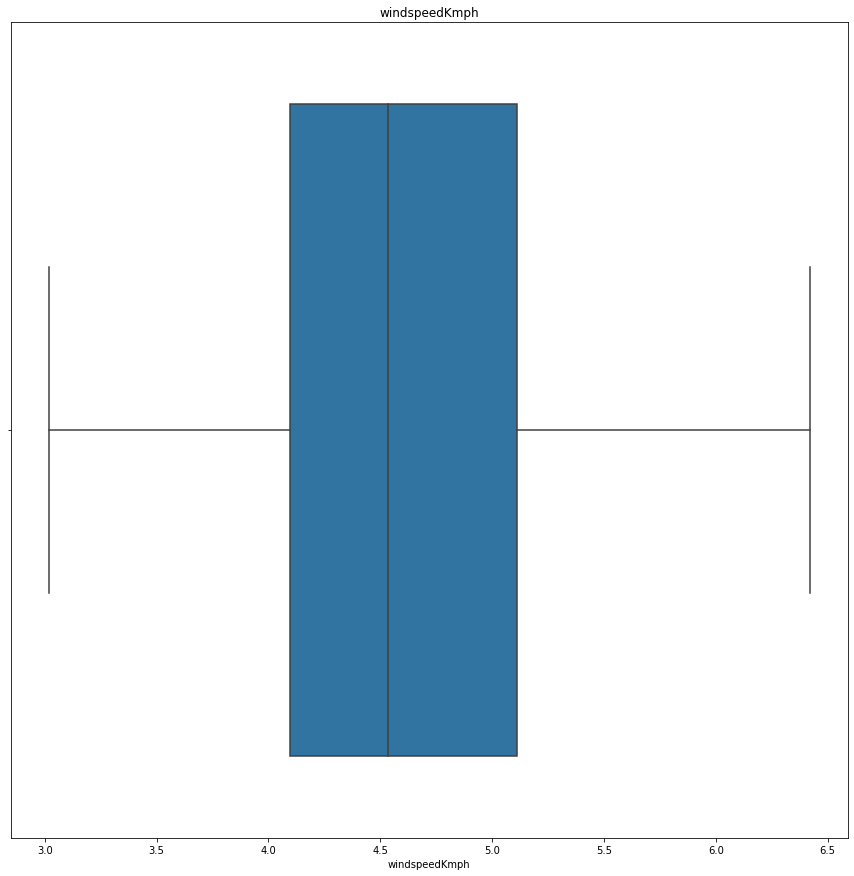

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in df_X:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

###Removing Outliers

In [ ]:
IQR=df_X.exmaus.quantile(0.75)-df_X.exmaus.quantile(0.25)
lower_bridge=df_X.exmaus.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.exmaus.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.8478875000000001 2.9913874999999996


In [ ]:
df_X.loc[df_X['exmaus']>=2.9913874999999996,'exmaus']=2.9913874999999996
df_X.loc[df_X['exmaus']<=1.8478875,'exmaus']=1.8478875

In [ ]:
IQR=df_X.oli_pri.quantile(0.75)-df_X.oli_pri.quantile(0.25)
lower_bridge=df_X.oli_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.oli_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1124.6712499999994 5473.141250000001


In [ ]:
df_X.loc[df_X['oli_pri']>=5473.141250000001,'oli_pri']=5473.141250000001
df_X.loc[df_X['oli_pri']<=1124.6712499999994,'oli_pri']=1124.6712499999994

In [ ]:
IQR=df_X.tmax_degC.quantile(0.75)-df_X.tmax_degC.quantile(0.25)
lower_bridge=df_X.tmax_degC.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.tmax_degC.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

29.13375 33.24375


In [ ]:
df_X.loc[df_X['tmax_degC']>=33.24375,'tmax_degC']=33.24375
df_X.loc[df_X['tmax_degC']<=29.13375,'tmax_degC']=29.13375

In [ ]:
IQR=df_X.tmin_degC.quantile(0.75)-df_X.tmin_degC.quantile(0.25)
lower_bridge=df_X.tmin_degC.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.tmin_degC.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

19.397499999999994 22.057500000000005


In [ ]:
df_X.loc[df['tmin_degC']>=22.057500000000005,'tmin_degC']=22.057500000000005
df_X.loc[df['tmin_degC']<=19.397499999999994,'tmin_degC']=19.397499999999994

In [ ]:
IQR=df_X.ws_mps.quantile(0.75)-df_X.ws_mps.quantile(0.25)
lower_bridge=df_X.ws_mps.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.ws_mps.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.7199999999999999 1.92


In [ ]:
df_X.loc[df['ws_mps']>=1.92,'ws_mps']=1.92
df_X.loc[df['ws_mps']<=0.7199999999999999,'ws_mps']=0.7199999999999999

In [ ]:
IQR=df_X.maxtempC.quantile(0.75)-df_X.maxtempC.quantile(0.25)
lower_bridge=df_X.maxtempC.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.maxtempC.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

29.967741945000007 36.225806444999996


In [ ]:
df_X.loc[df_X['maxtempC']>=36.225806444999996,'maxtempC']=36.225806444999996
df_X.loc[df_X['maxtempC']<=-29.967741945000007,'maxtempC']=-29.967741945000007

In [ ]:
IQR=df_X.totalSnow_cm.quantile(0.75)-df_X.totalSnow_cm.quantile(0.25)
lower_bridge=df_X.totalSnow_cm.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.totalSnow_cm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.0 0.0


In [ ]:
df_X.loc[df['totalSnow_cm']>=0.0,'totalSnow_cm']=0.0
df_X.loc[df['totalSnow_cm']<=0.0,'totalSnow_cm']=0.0

In [ ]:
IQR=df_X.sunHour.quantile(0.75)-df_X.sunHour.quantile(0.25)
lower_bridge=df_X.sunHour.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.sunHour.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

9.55870966625 12.232258076250002


In [ ]:
df_X.loc[df_X['sunHour']>=12.232258076250002,'sunHour']=12.232258076250002
df_X.loc[df_X['sunHour']<=9.55870966625,'sunHour']=9.55870966625

In [ ]:
IQR=df_X.moon_illumination.quantile(0.75)-df_X.moon_illumination.quantile(0.25)
lower_bridge=df_X.moon_illumination.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.moon_illumination.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

46.95564516499999 53.20080644500001


In [ ]:
df_X.loc[df_X['moon_illumination']>=53.20080644500001,'moon_illumination']=53.20080644500001
df_X.loc[df_X['moon_illumination']<=46.95564516499999,'moon_illumination']=46.95564516499999

In [ ]:
IQR=df_X.FeelsLikeC.quantile(0.75)-df_X.FeelsLikeC.quantile(0.25)
lower_bridge=df_X.FeelsLikeC.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.FeelsLikeC.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

29.63931451 34.67641129


In [ ]:
df_X.loc[df_X['FeelsLikeC']>=34.67641129,'FeelsLikeC']=34.67641129
df_X.loc[df_X['FeelsLikeC']<=29.63931451,'FeelsLikeC']=29.63931451

In [ ]:
IQR=df_X.HeatIndexC.quantile(0.75)-df_X.HeatIndexC .quantile(0.25)
lower_bridge=df_X.HeatIndexC .quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.HeatIndexC .quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

29.675813410000004 34.65451195


In [ ]:
df_X.loc[df_X['HeatIndexC']>=34.65451195,'HeatIndexC']=34.65451195
df_X.loc[df_X['HeatIndexC']<=29.675813410000004 ,'HeatIndexC ']=29.675813410000004 

In [ ]:
IQR=df_X.cloudcover.quantile(0.75)-df_X.cloudcover.quantile(0.25)
lower_bridge=df_X.cloudcover.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.cloudcover.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

17.248051086249998 57.967943536250004


In [ ]:
df_X.loc[df_X['cloudcover']>=57.967943536250004,'cloudcover']=57.967943536250004
df_X.loc[df_X['cloudcover']<=17.248051086249998,'cloudcover']=17.248051086249998 

In [ ]:
IQR=df_X.precipMM.quantile(0.75)-df_X.precipMM.quantile(0.25)
lower_bridge=df_X.precipMM.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.precipMM.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.18810483800000005 1.142540322


In [ ]:
df_X.loc[df_X['precipMM']>=1.142540322,'precipMM']=1.142540322
df_X.loc[df_X['precipMM']<=-0.18810483800000005,'precipMM']=-0.18810483800000005

In [ ]:
IQR=df_X.pressure.quantile(0.75)-df_X.pressure.quantile(0.25)
lower_bridge=df_X.pressure.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.pressure.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1007.7029571249998 1011.5298381250002


In [ ]:
df_X.loc[df_X['pressure']>=1011.5298381250002,'pressure']=1011.5298381250002
df_X.loc[df_X['pressure']<=1007.7029571249998,'pressure']=1007.7029571249998

In [ ]:
IQR=df_X.visibility.quantile(0.75)-df_X.visibility.quantile(0.25)
lower_bridge=df_X.visibility.quantile(0.25)-(IQR*1.5)
upper_bridge=df_X.visibility.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

7.760191880249998 10.603239710250001


In [ ]:
df_X.loc[df_X['visibility']>=10.603239710250001,'visibility']=10.603239710250001
df_X.loc[df_X['visibility']<=7.760191880249998,'visibility']=7.760191880249998

###Plot of Features without Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

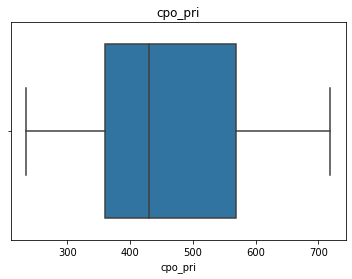

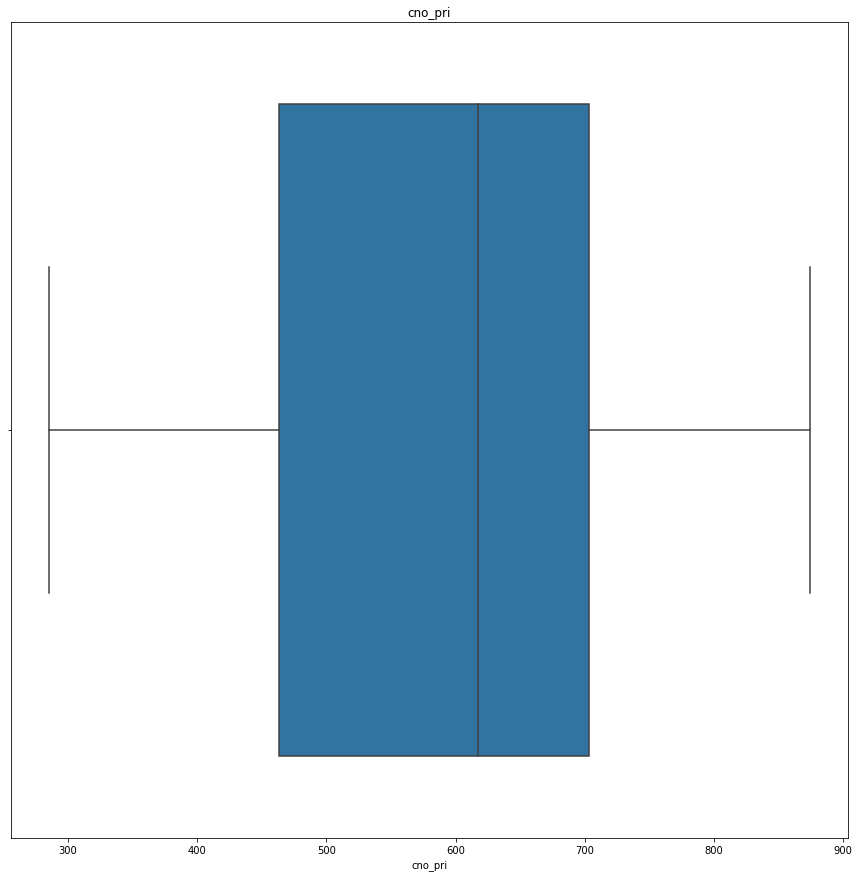

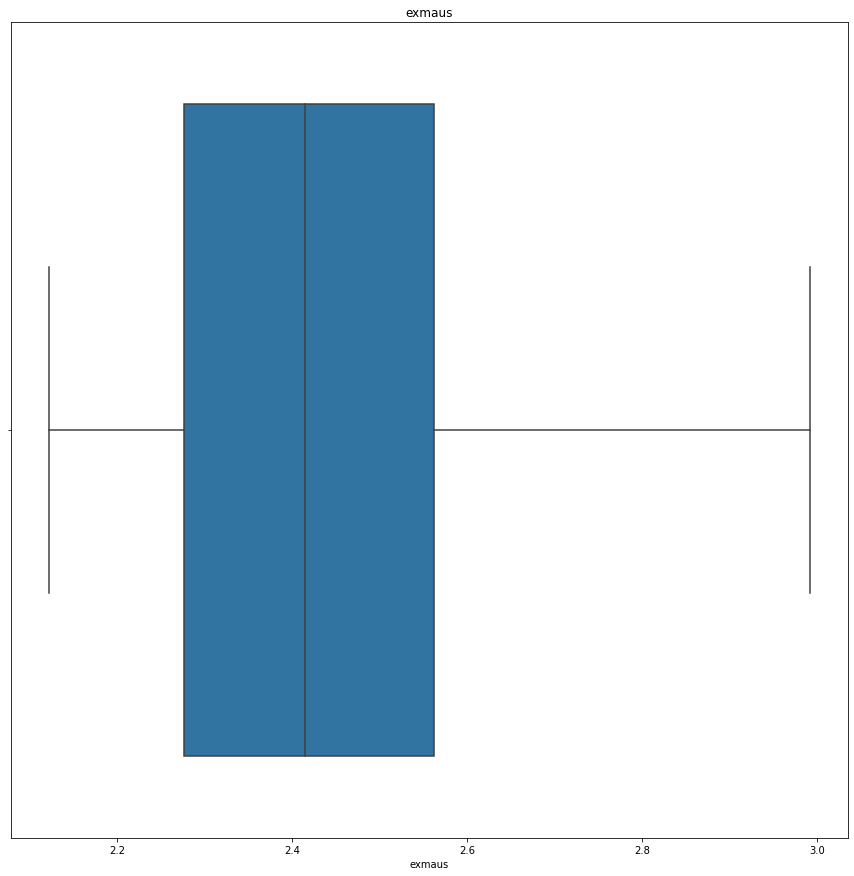

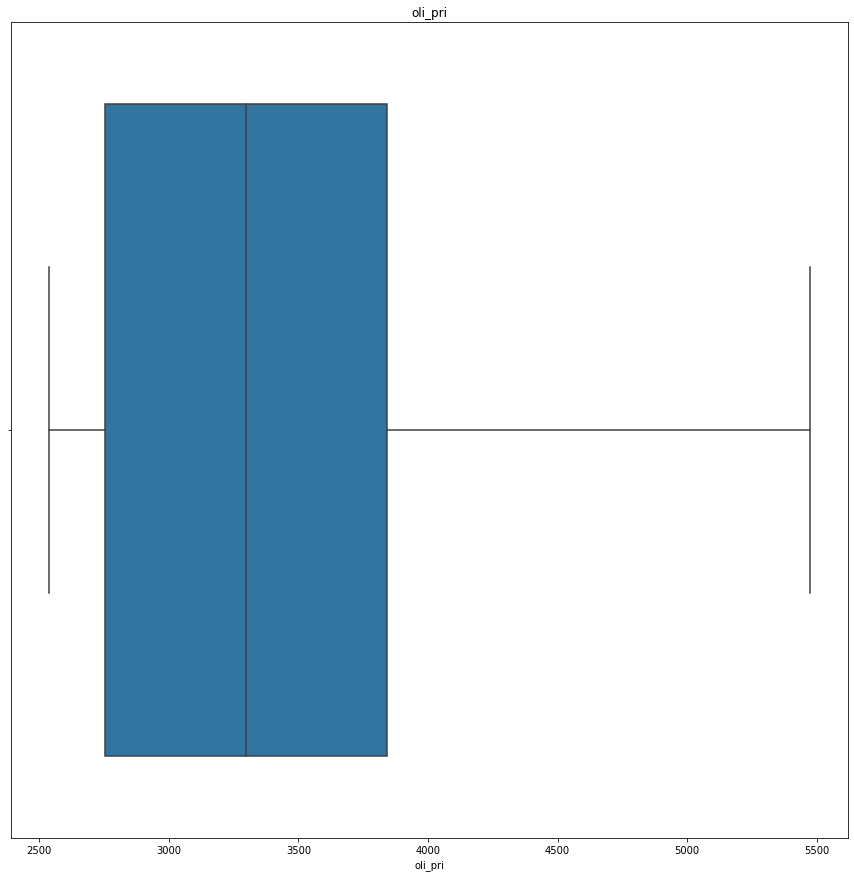

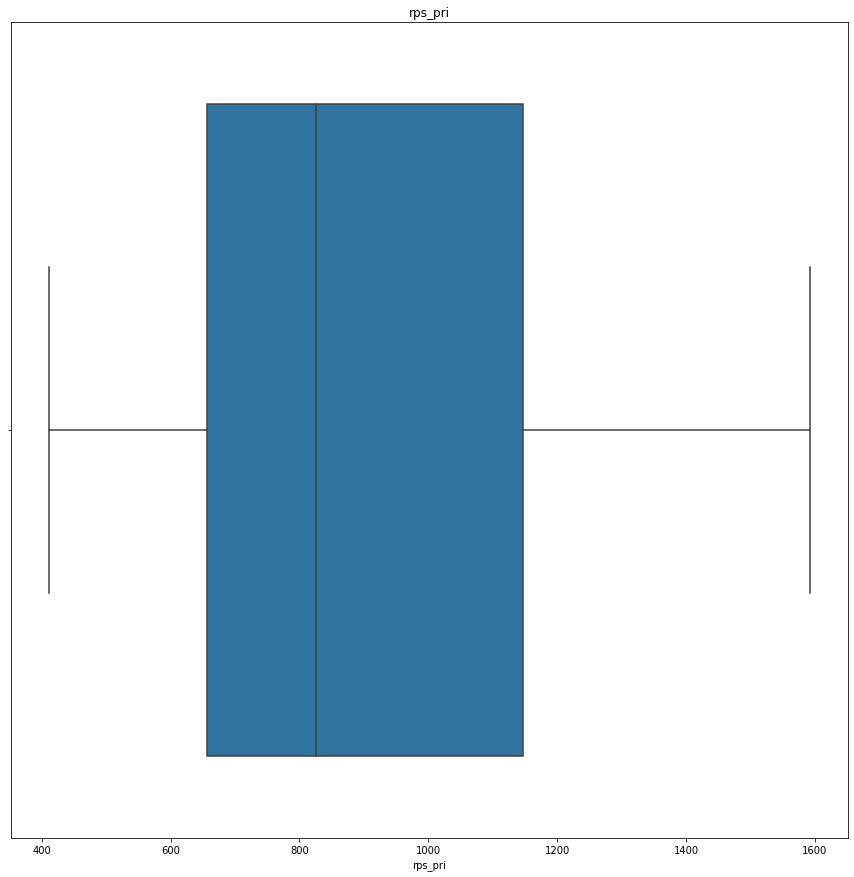

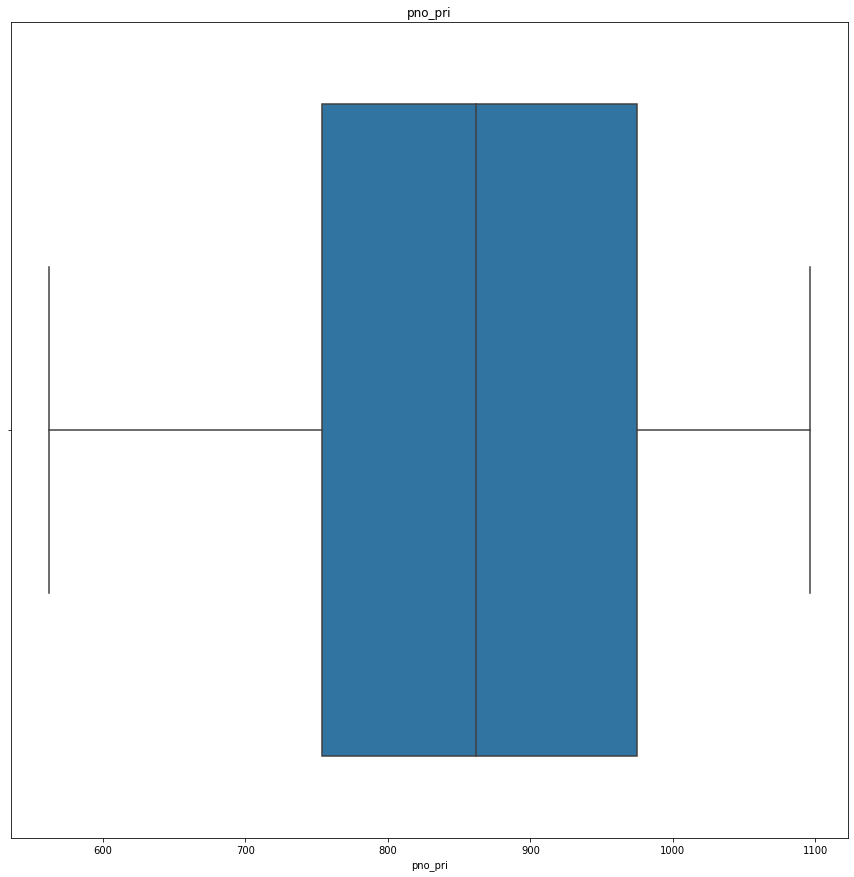

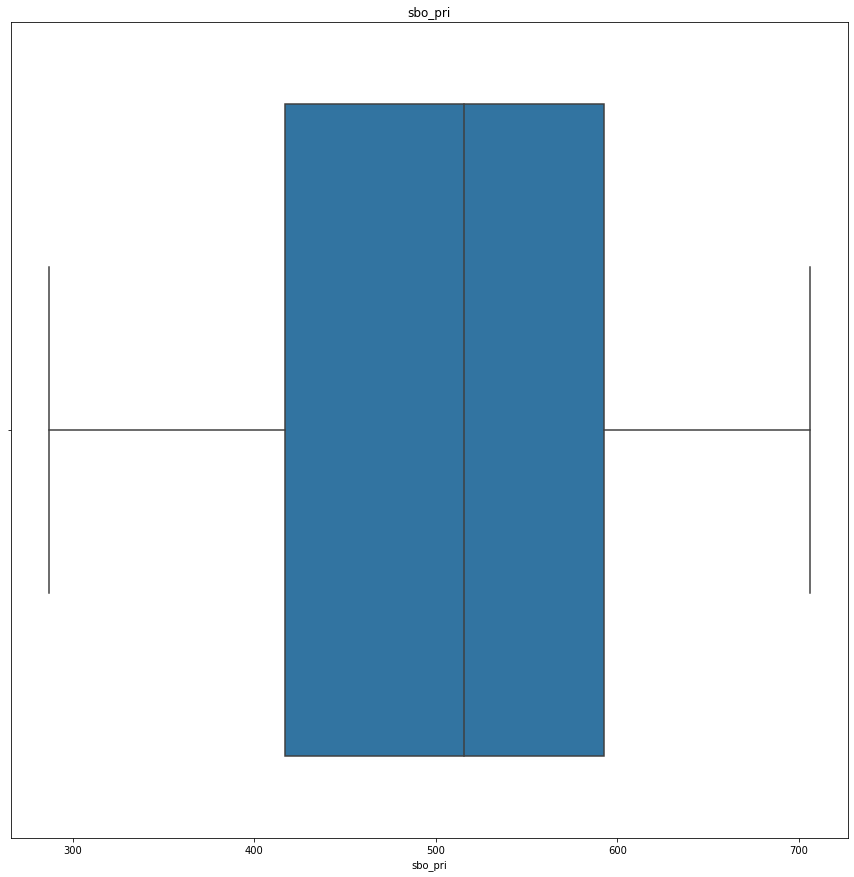

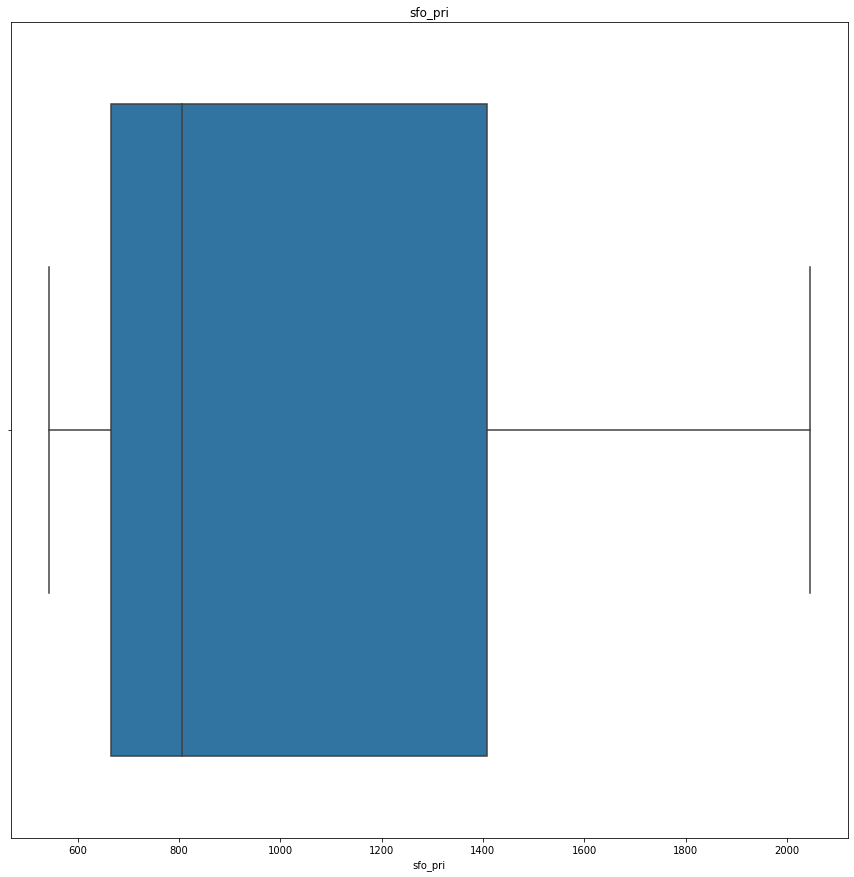

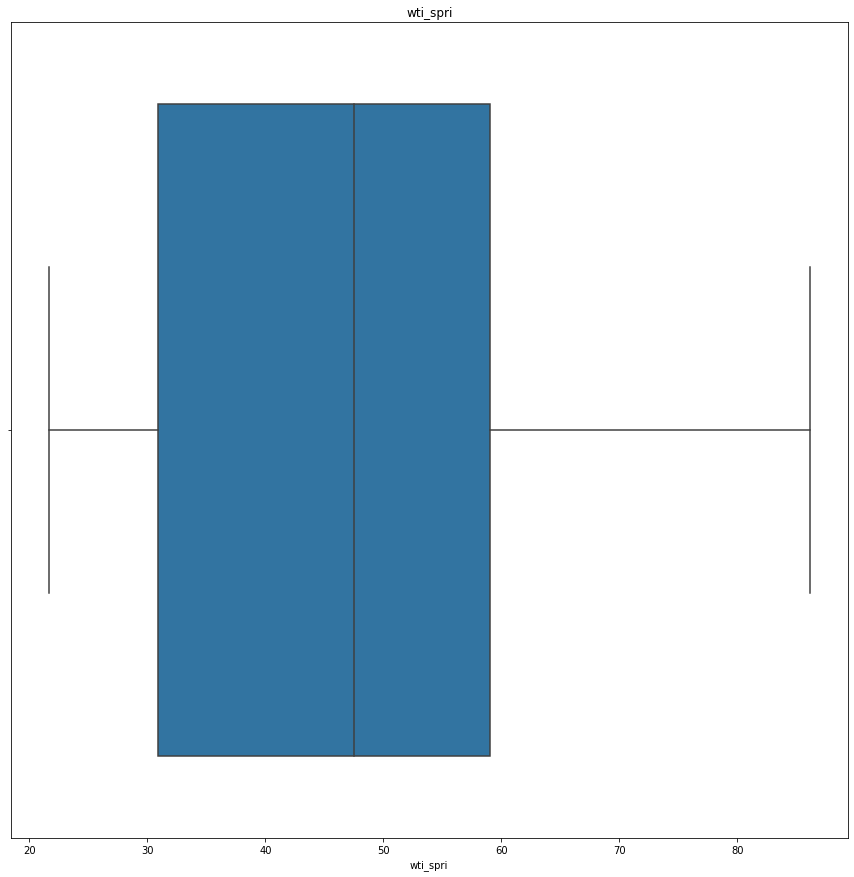

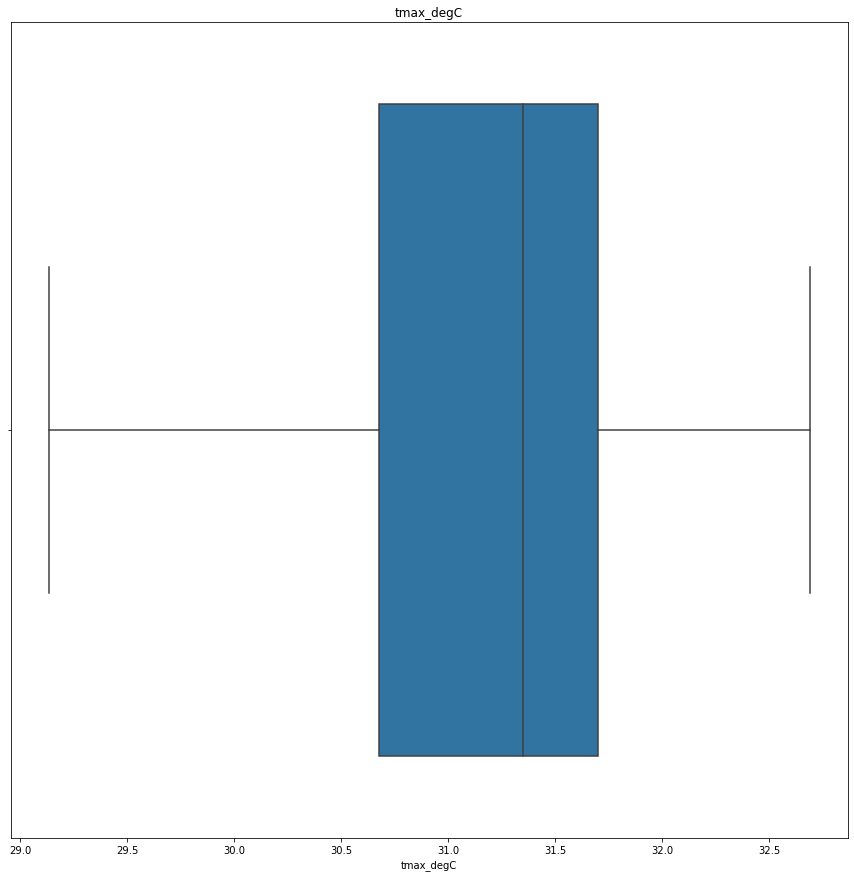

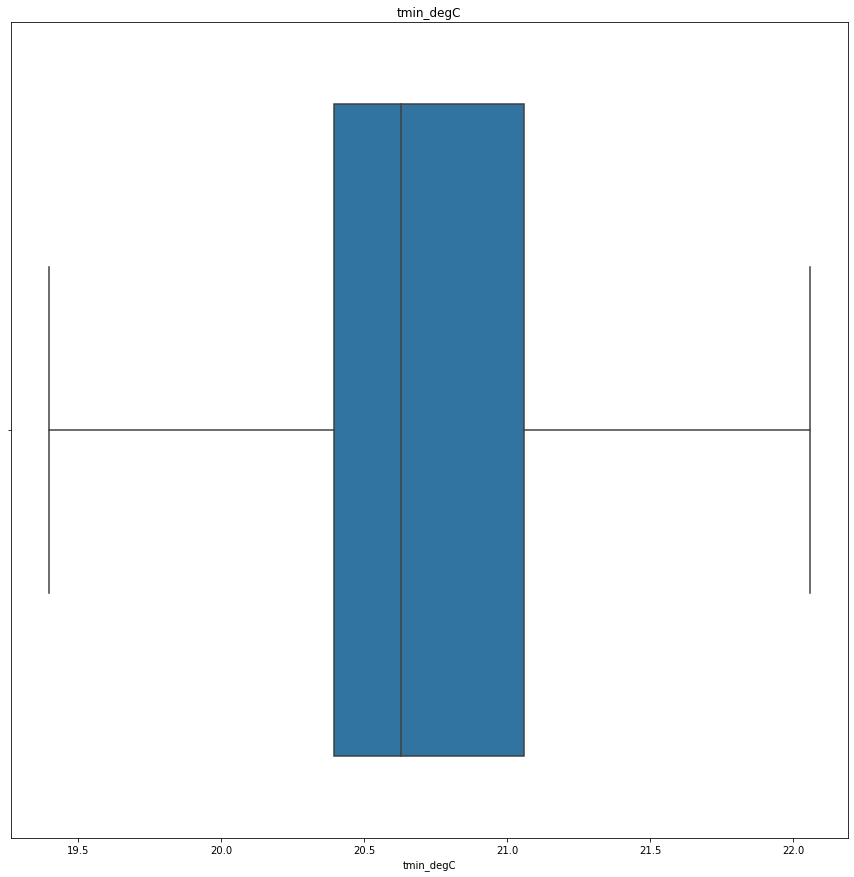

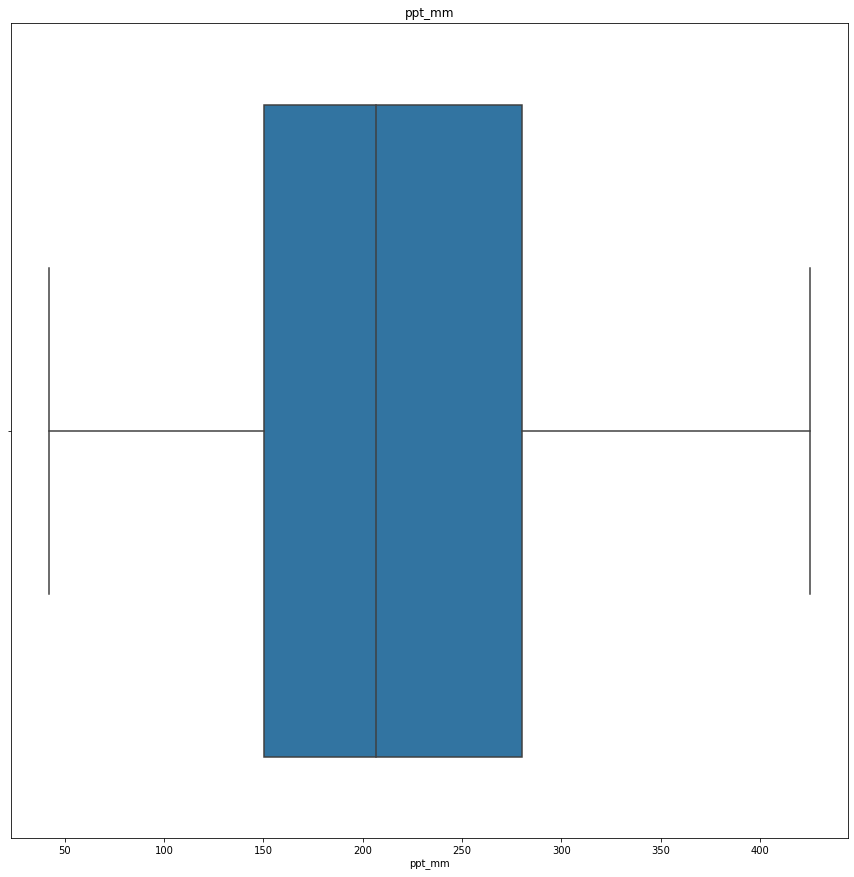

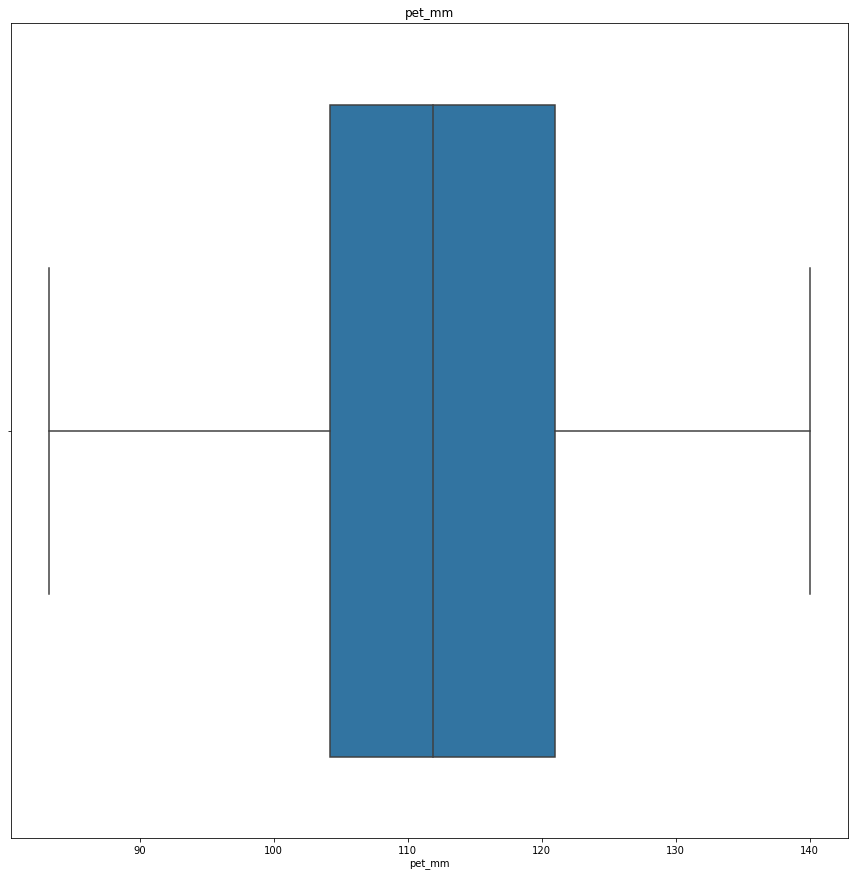

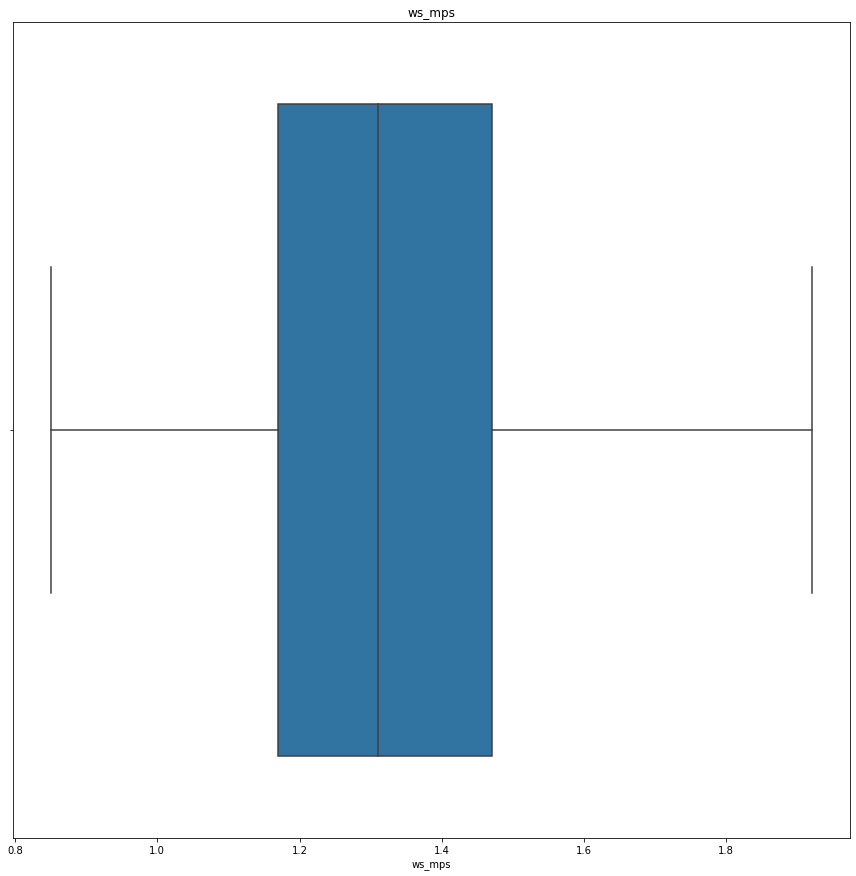

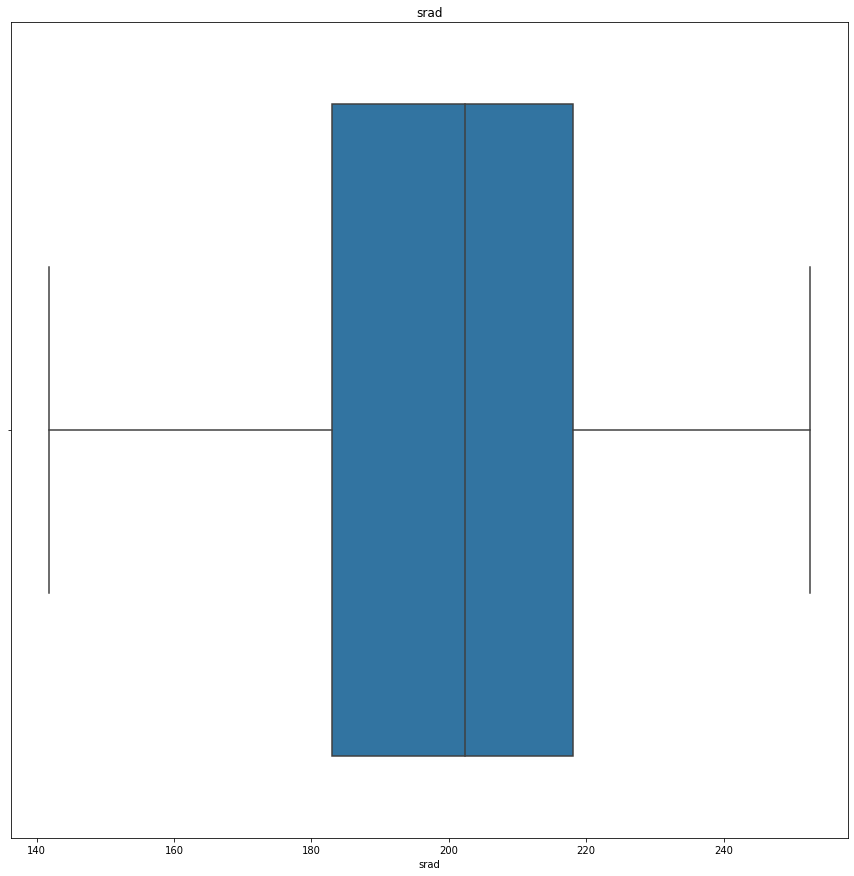

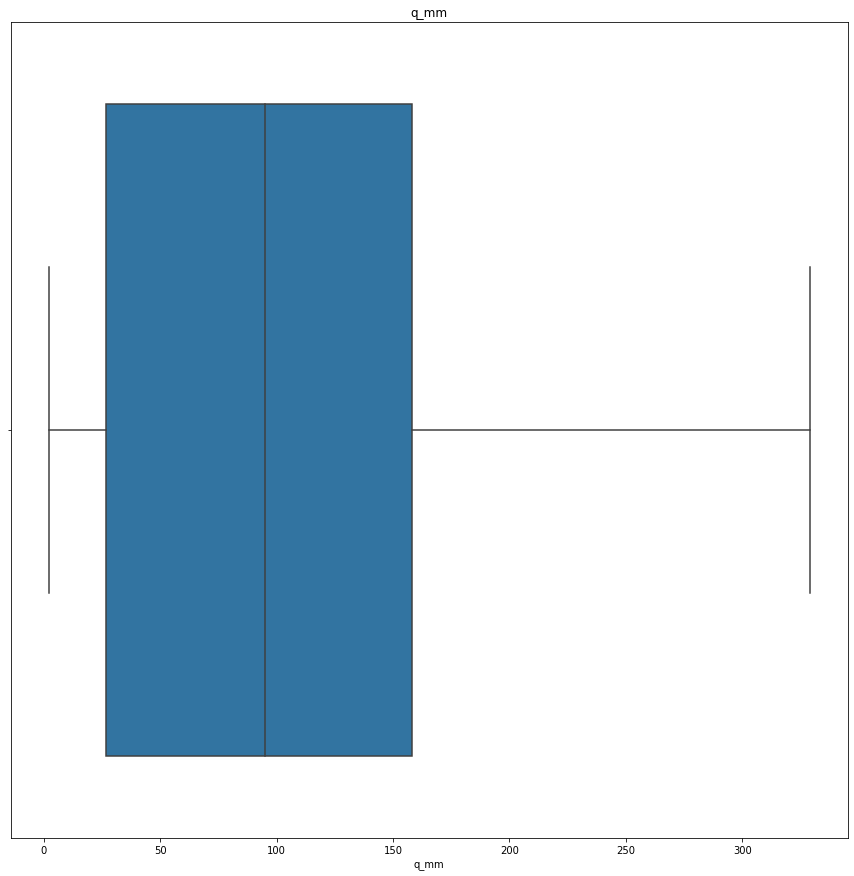

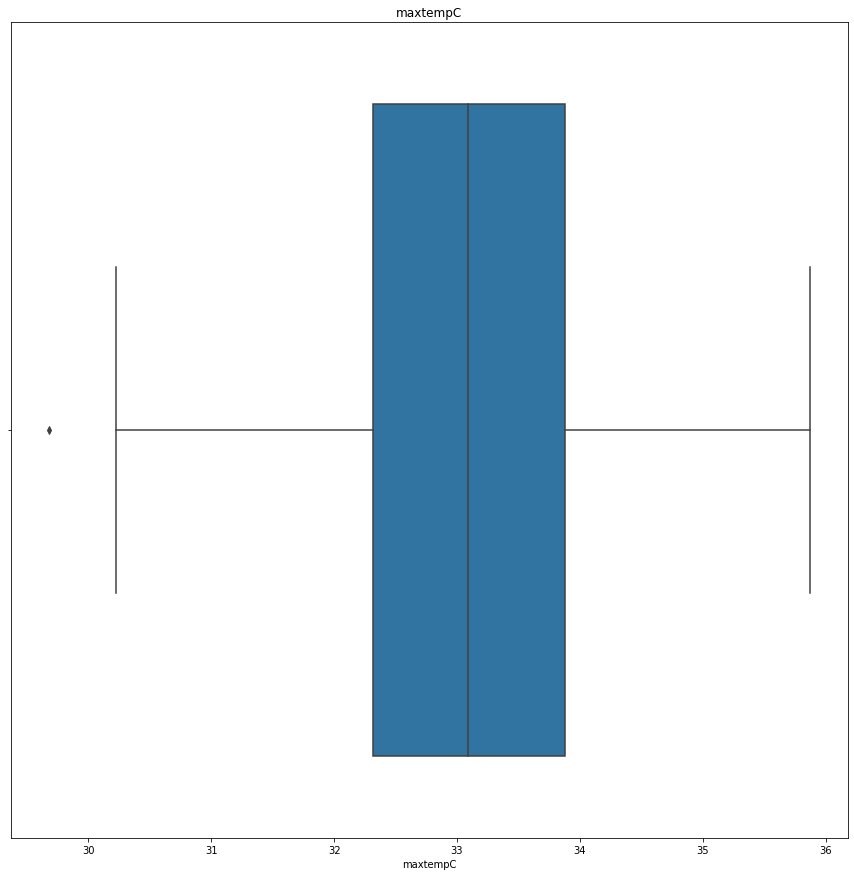

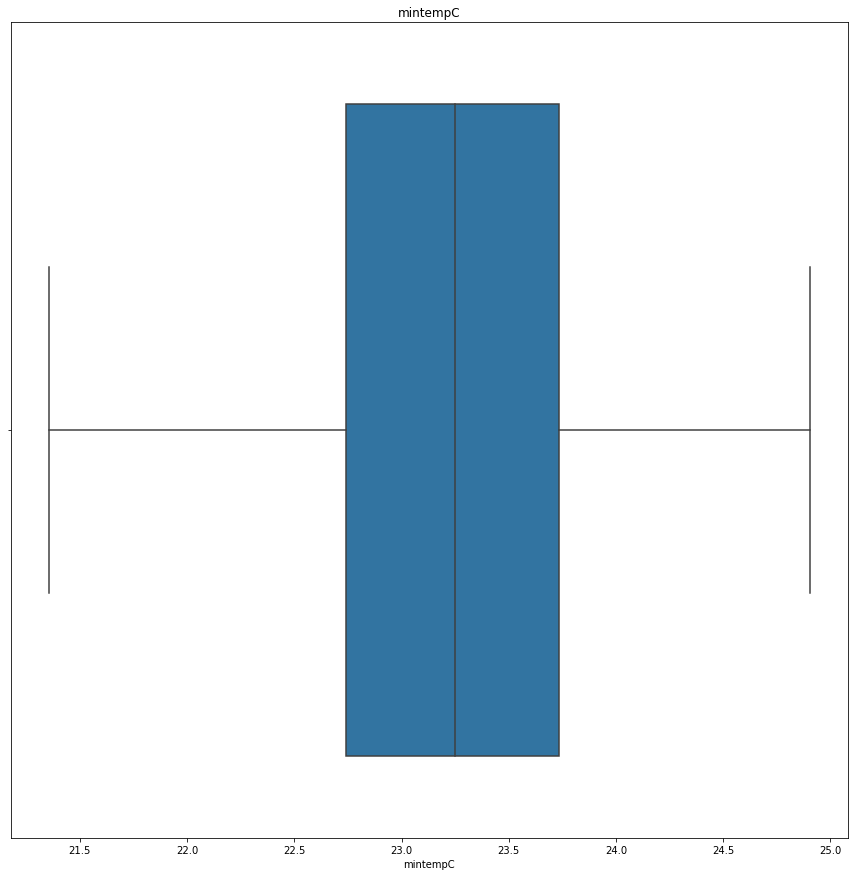

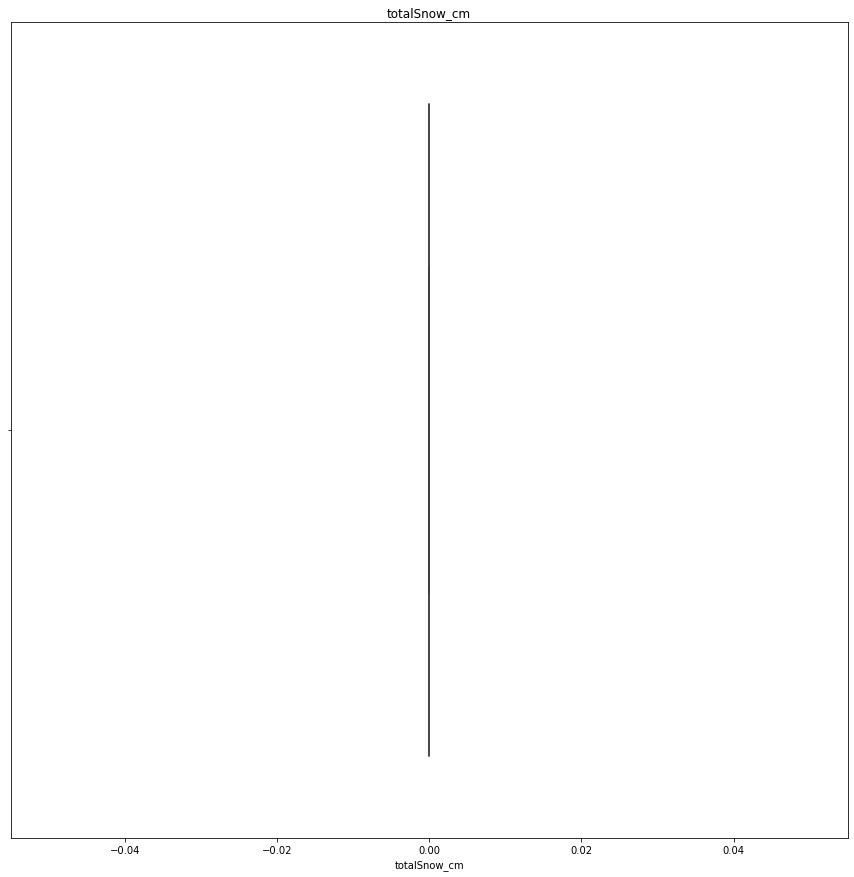

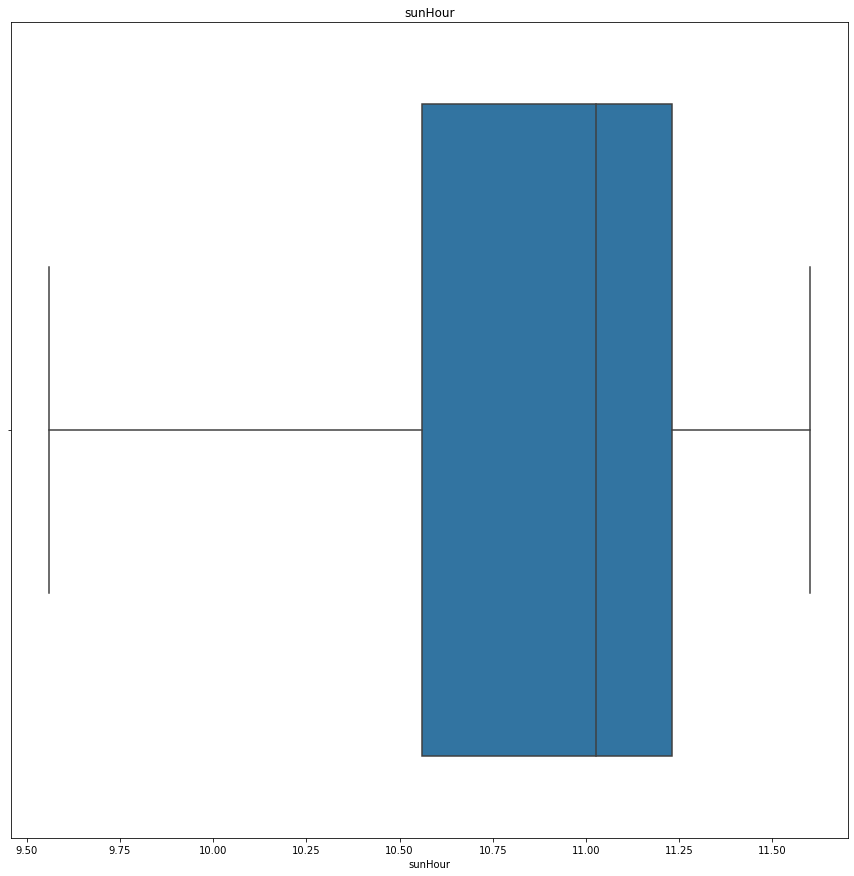

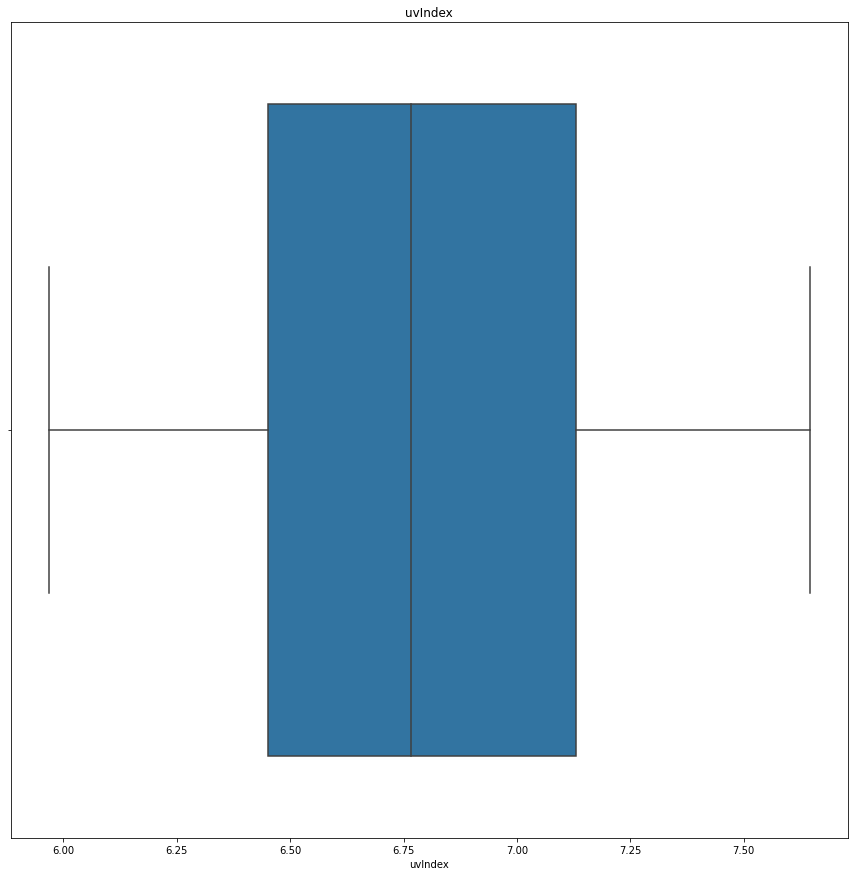

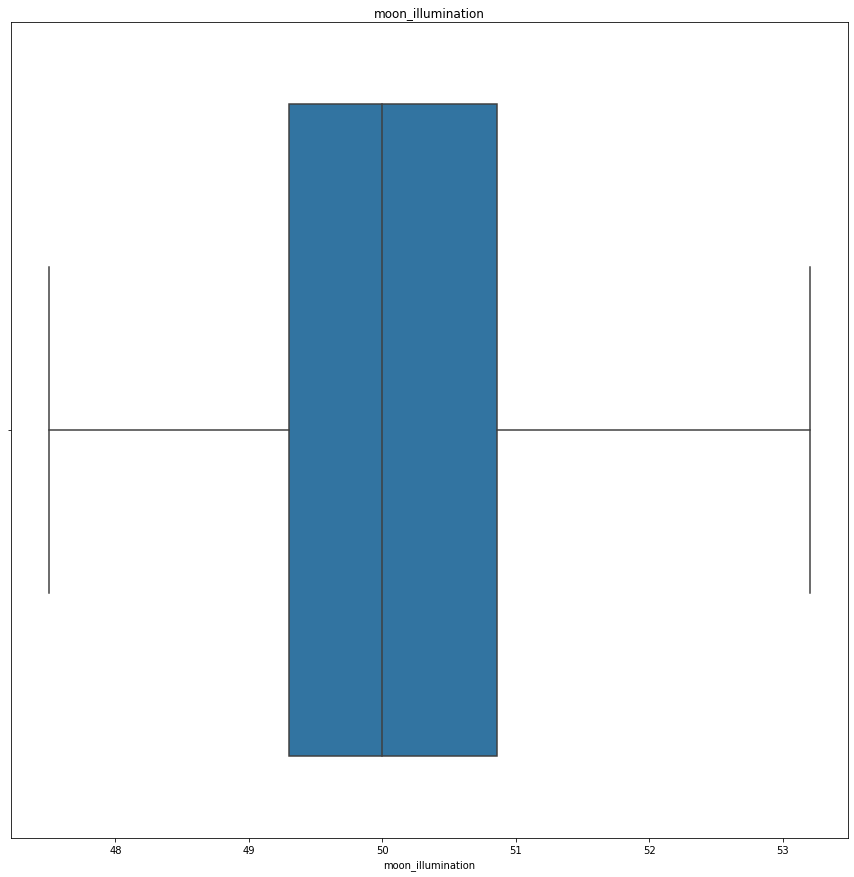

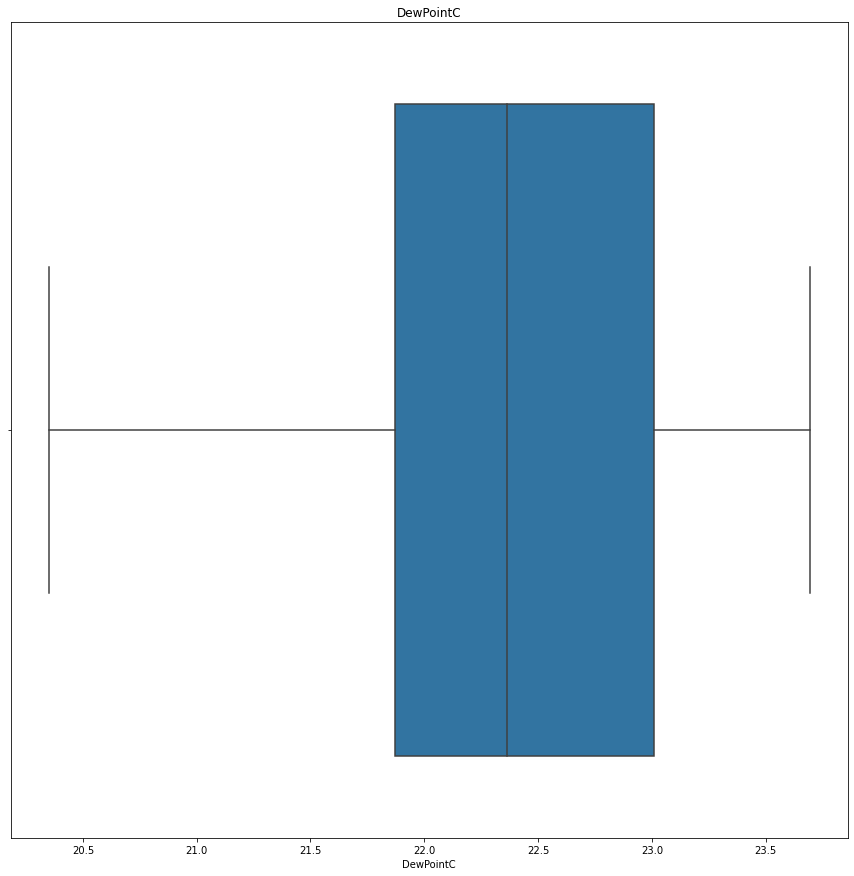

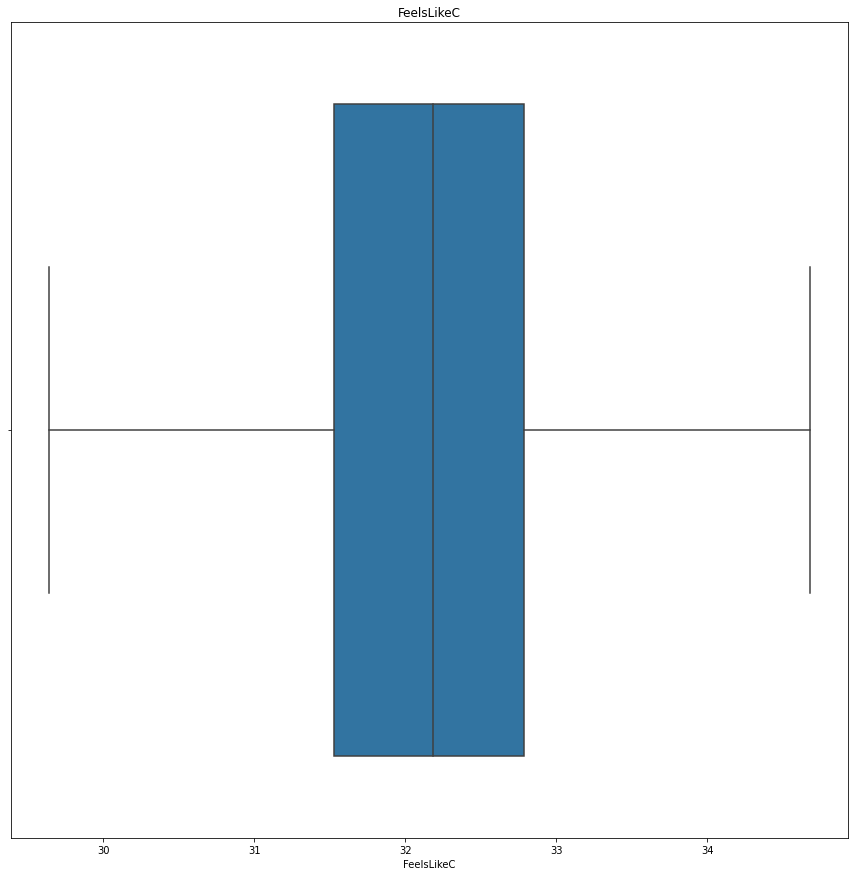

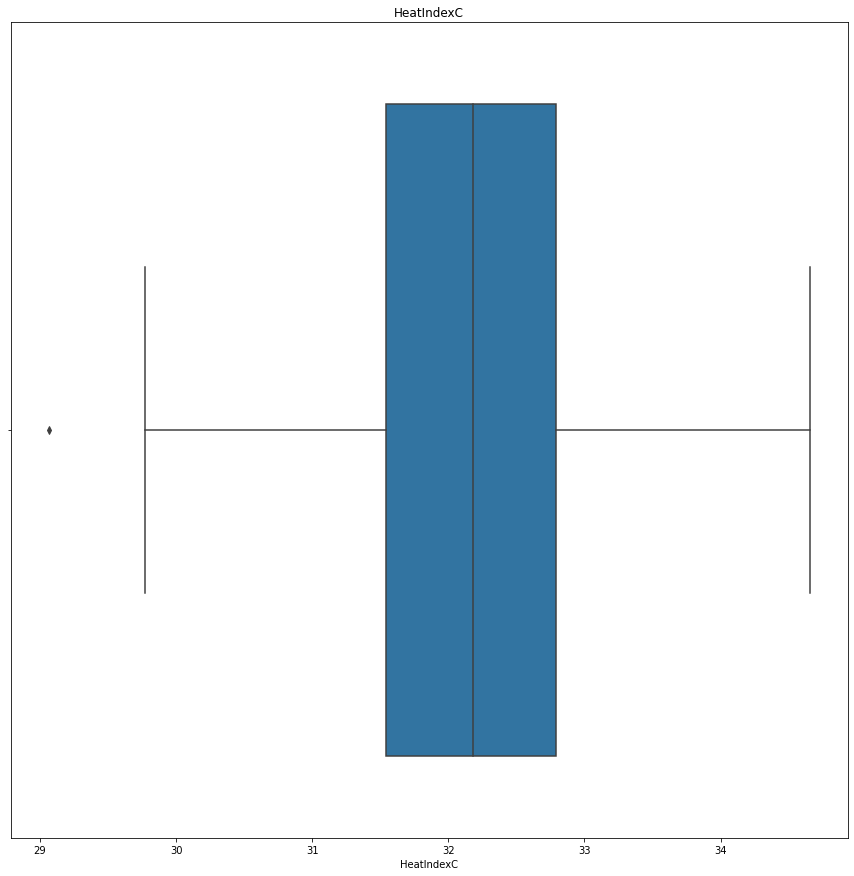

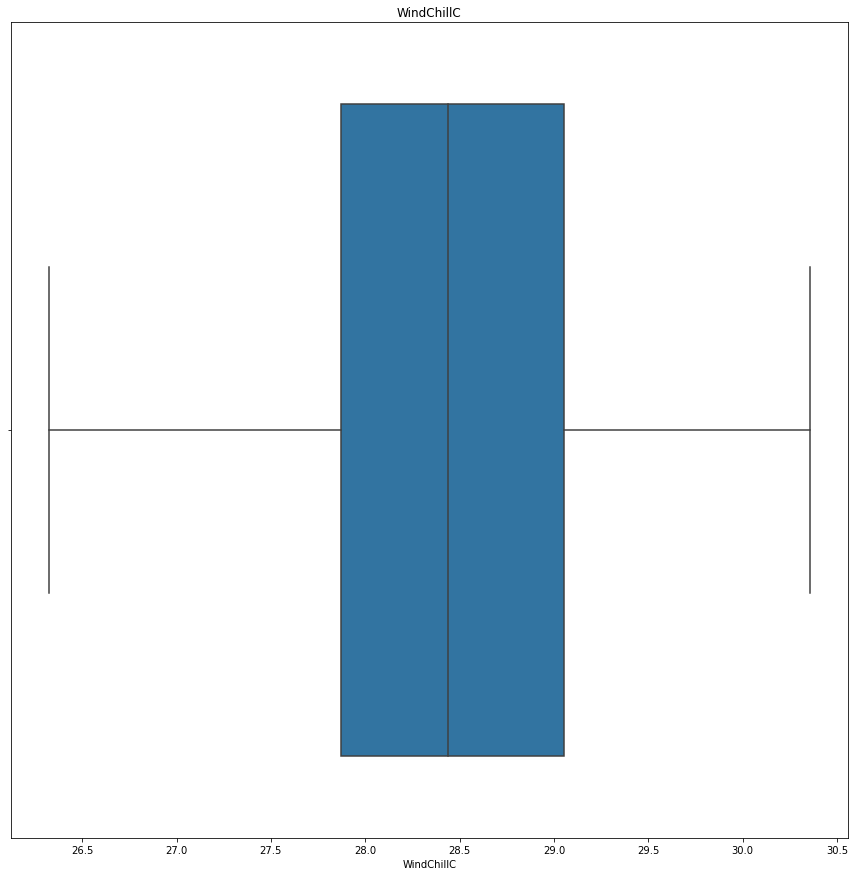

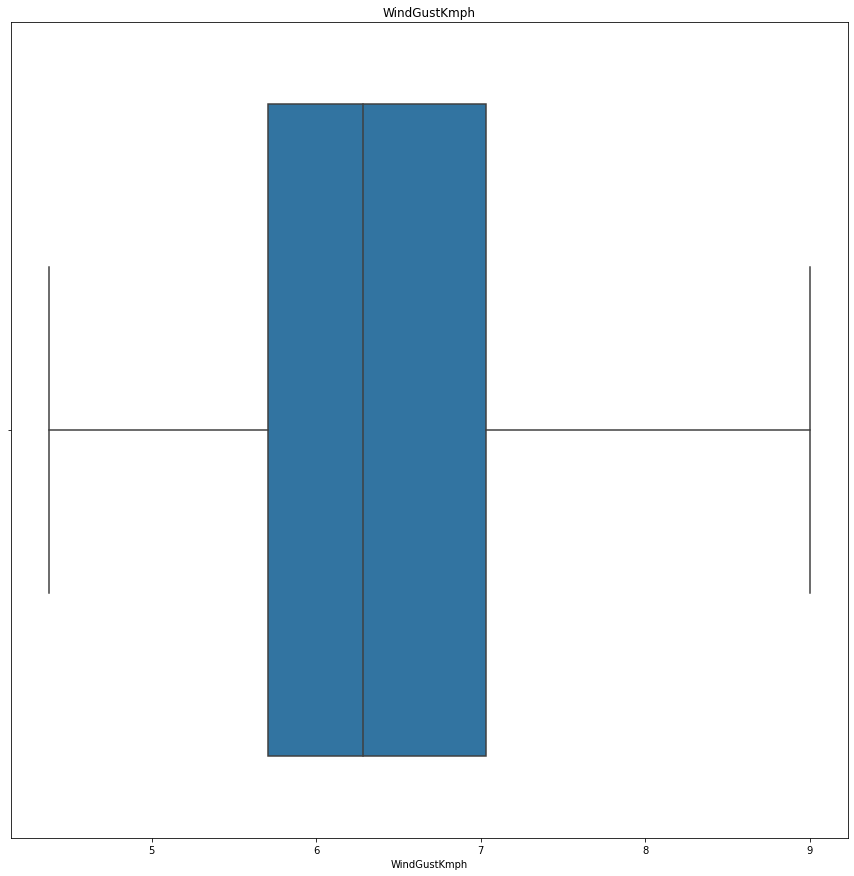

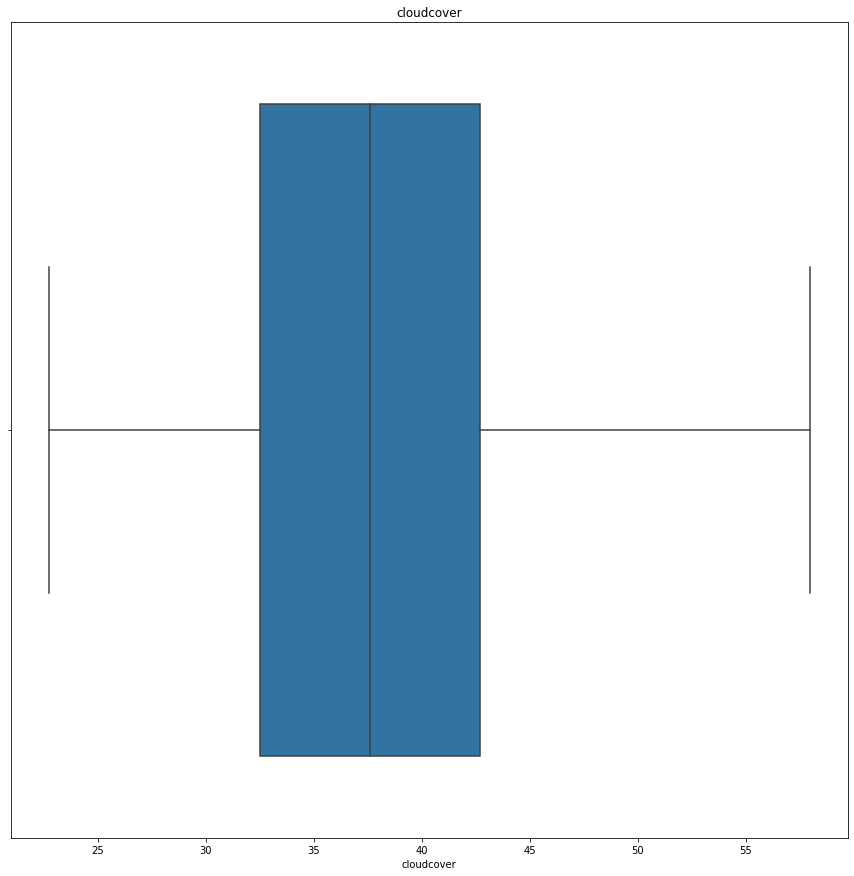

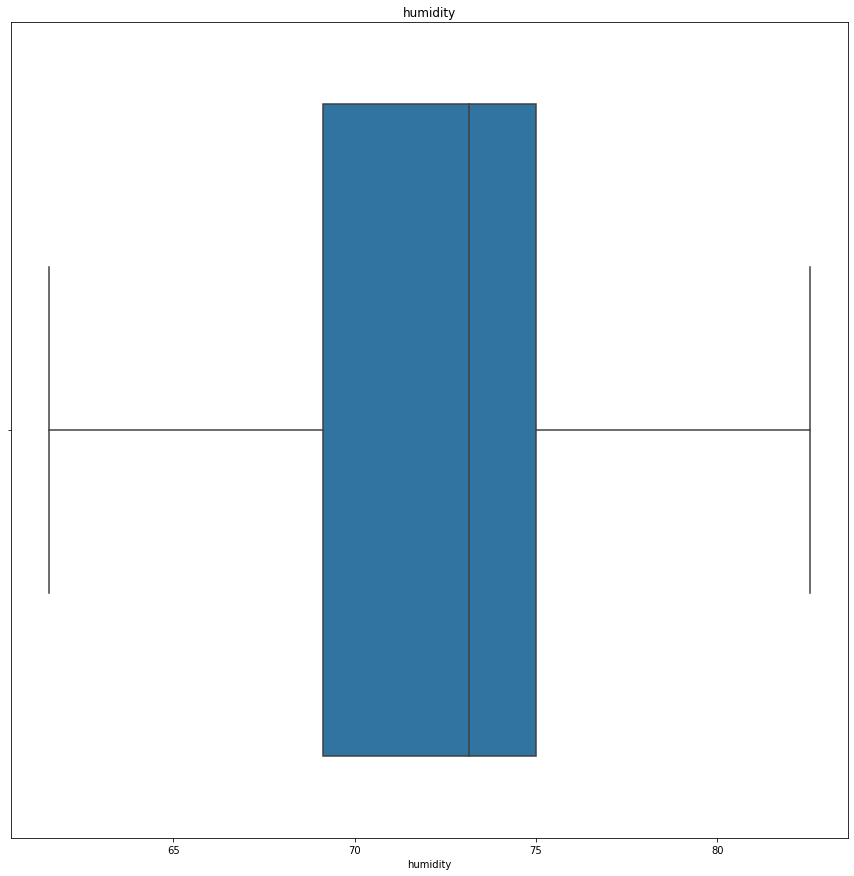

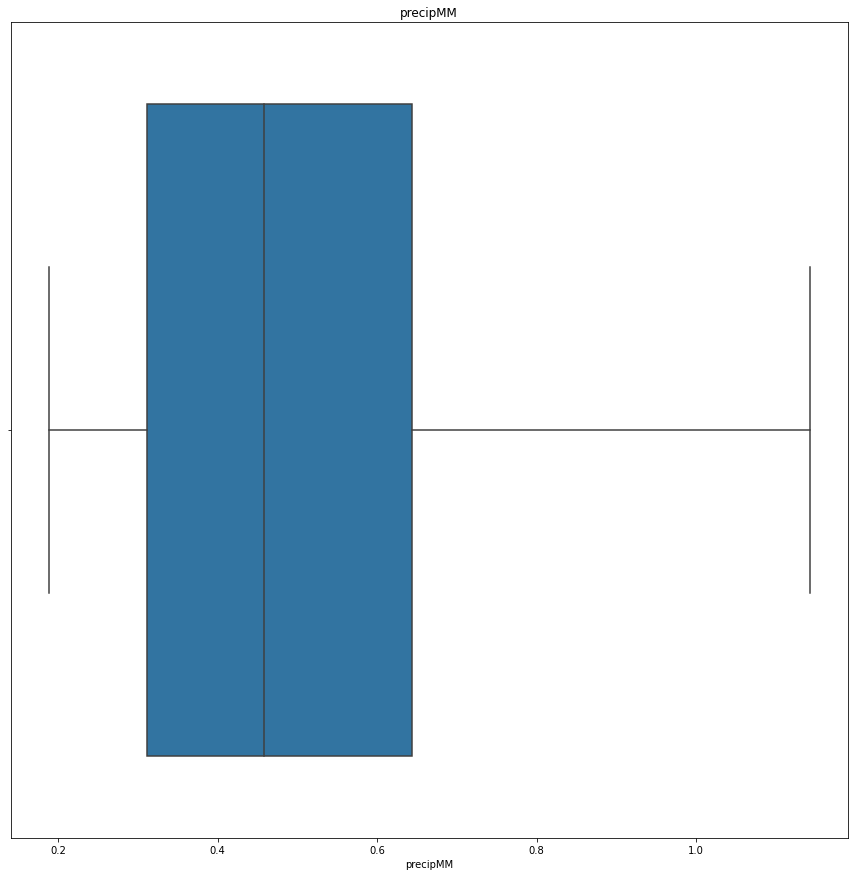

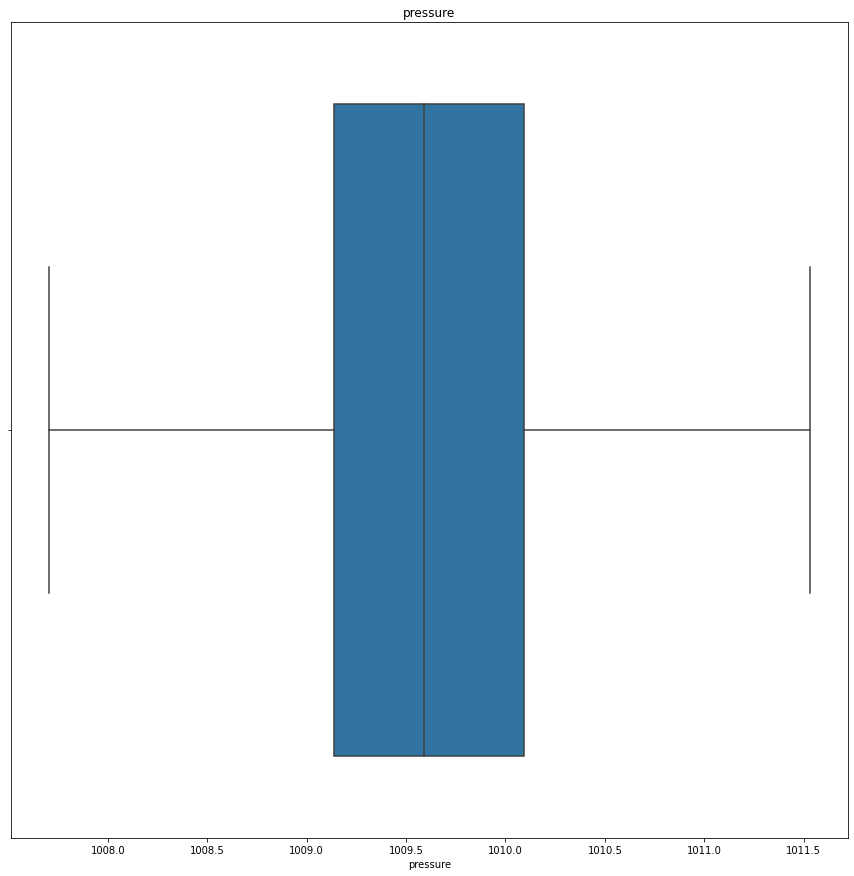

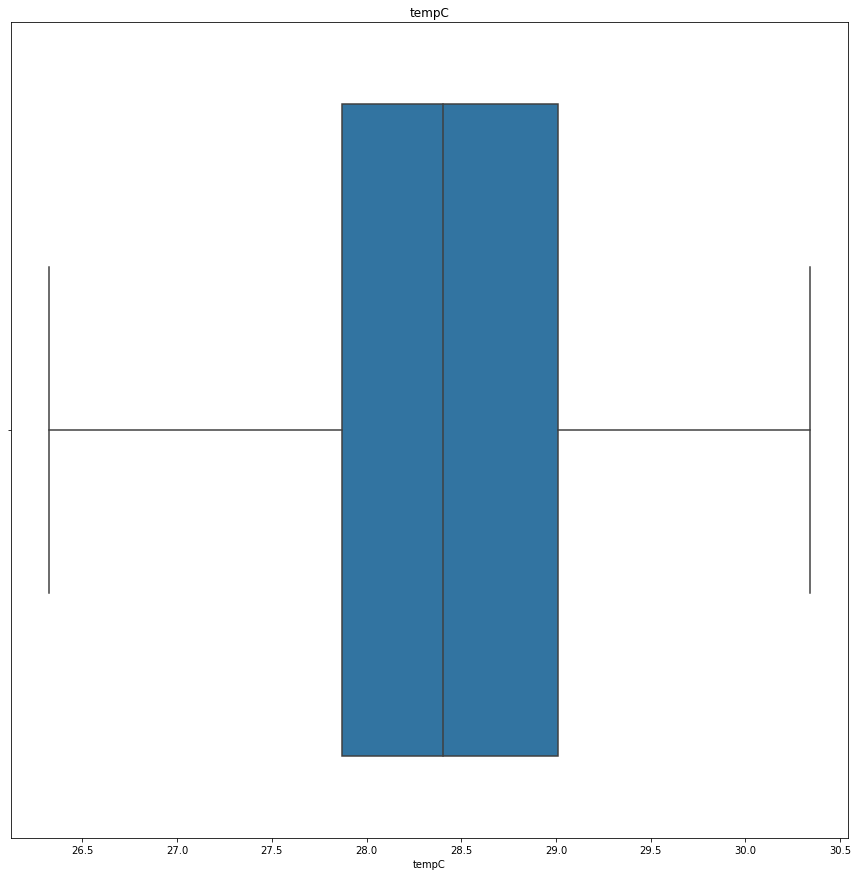

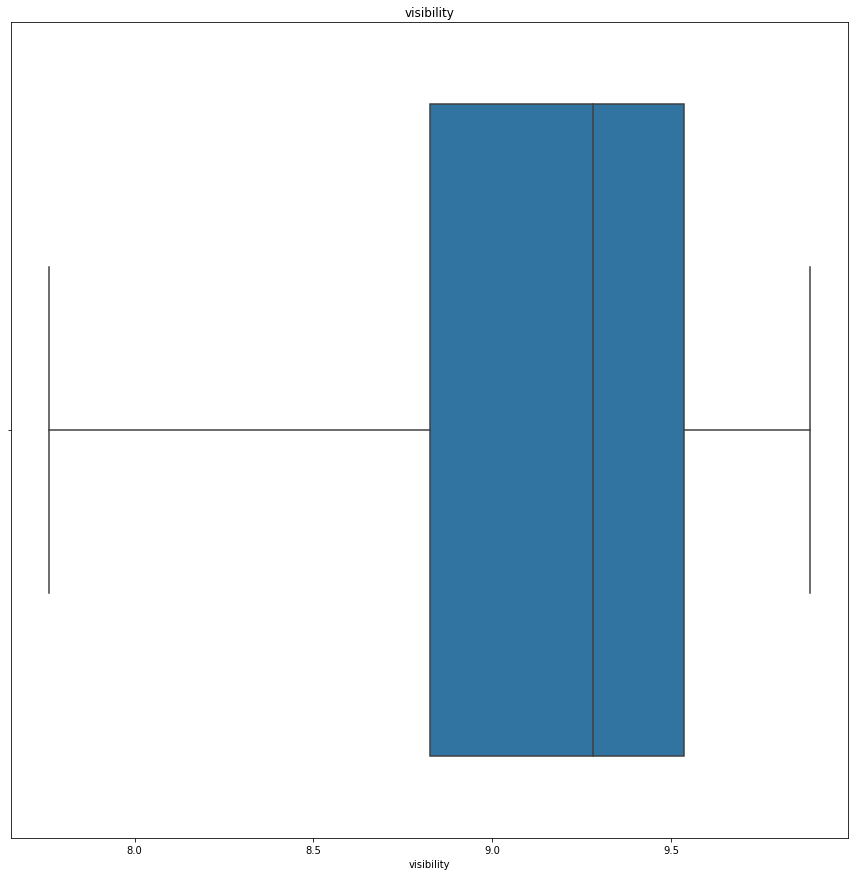

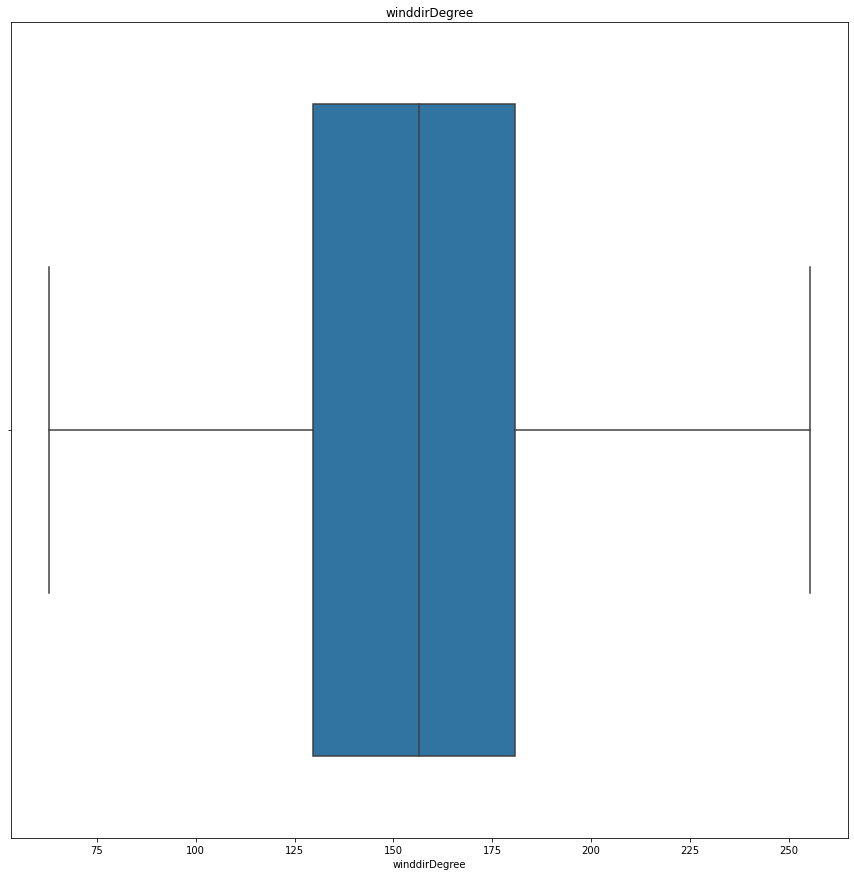

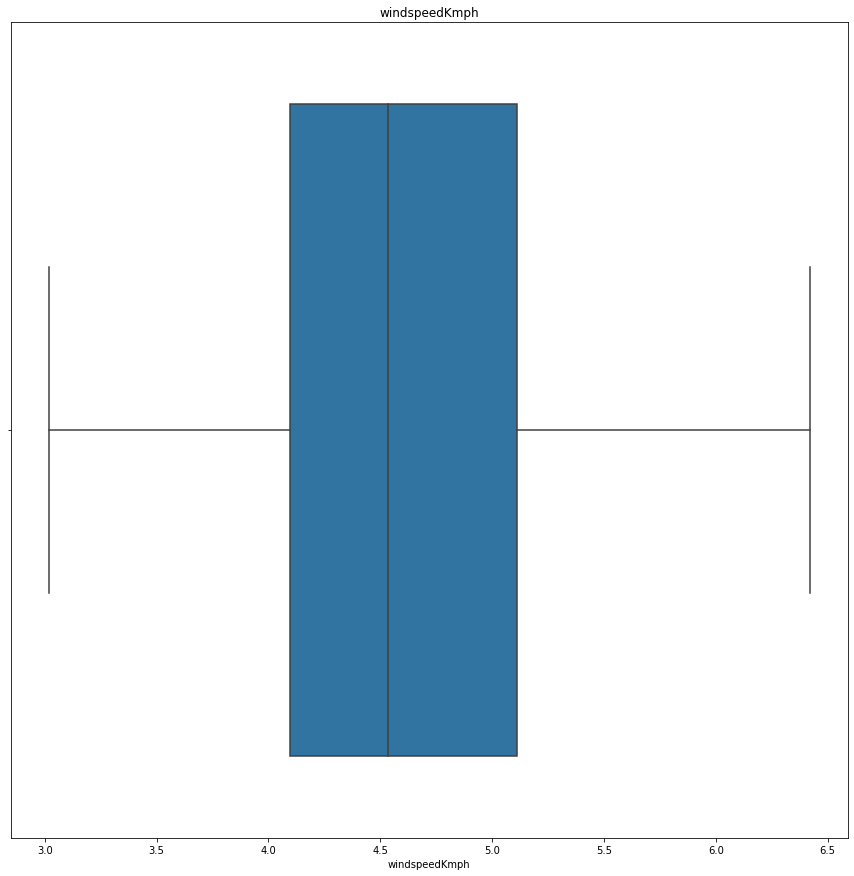

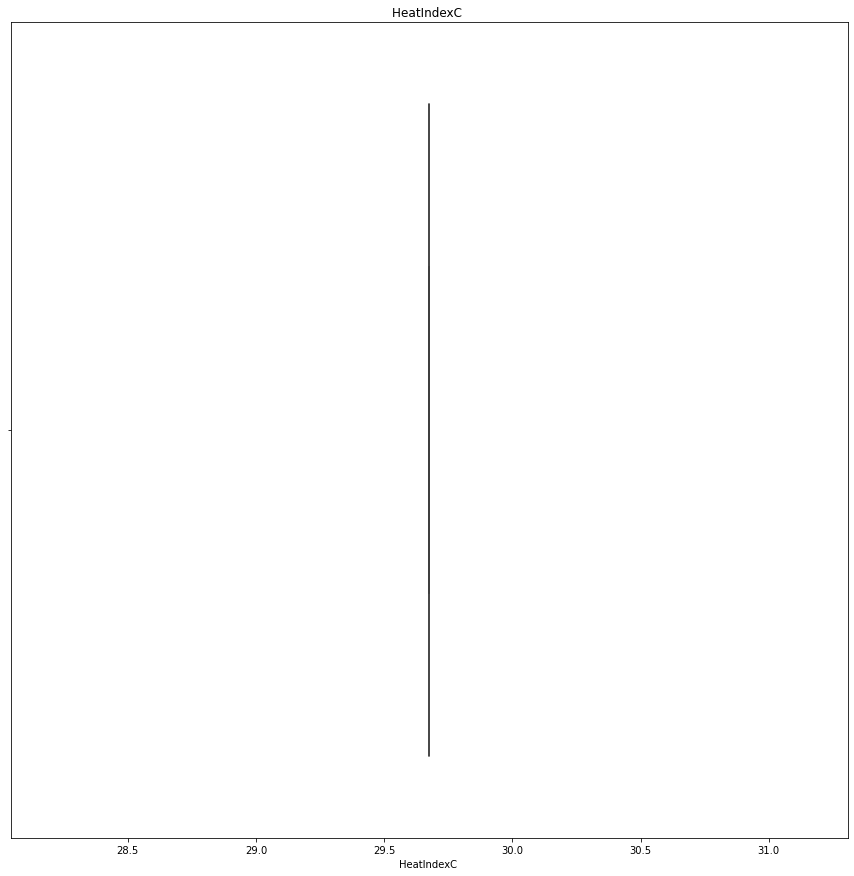

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in df_X:
    sns.boxplot(df_X[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [ ]:
#heatindex
#max temp

In [ ]:
#Save the preprocessed to csv 
df_X.to_csv("preprocessed.csv")